# EDA on Finance Dataset

This notebook will focus on the Exploratory Data Analysis of the financail loans dataset. 

## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
from transformation import DataTransform
from transformation import DataFrameTransform
from transformation import Plotter
from db_utils import RDSDatabaseConnector
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


## Loading in the dataset

The loans csv extracted from the AWS RDS was previously extracted and saved locally. This is now loaded in as pandas to allow the use of EDA techniques.

In [2]:
df = pd.read_csv('loan_payments.csv')
df.head()


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82   
1                     0.0           Jan-2022              407.52   
2                     0.0           Oct-2021            12850.16   
3                     0.0           Jun-2021            13899.67   
4                     0.0           Jan-2022              456.54   

  next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0          Feb-2022              Jan-2022                        0.0   
1          Feb-2022              Jan-2022                        0.0   
2               NaN              Oct-2021                        0.0   
3               NaN              Jun-2021                        0.0   
4          Feb-2022              Jan-2022                        0.0   

  mths_since_last_major_derog  policy_code  application_type  
0                         5.0            1        INDIVIDUAL  
1                         NaN            1        INDIVIDUAL  
2                         NaN            1        INDIVIDUAL  
3                         NaN            1        INDIVIDUAL  
4                         NaN            1        INDIVIDUAL  

[5 rows x 43 columns]

## Ensuring Columns are correct Datatype

The code below gives me some useful information about the dataset

In [3]:
transformer = DataFrameTransform(df)

null_values_before = transformer.check_null_values()
print("NULL values before imputation:")
print(null_values_before)

columns_to_drop = [col for col in df.columns if (df[col].isnull().mean() > 0.5)]
print("Columns to drop:", columns_to_drop)
transformer.drop_columns(columns_to_drop)

transformer.impute_missing_values(strategy='mean')
null_values_after = transformer.check_null_values_after()
print("NULL values after imputation:")
print(null_values_after)

NULL values before imputation:
{'id': 0, 'member_id': 0, 'loan_amount': 0, 'funded_amount': 3007, 'funded_amount_inv': 0, 'term': 4772, 'int_rate': 5169, 'instalment': 0, 'grade': 0, 'sub_grade': 0, 'employment_length': 2118, 'home_ownership': 0, 'annual_inc': 0, 'verification_status': 0, 'issue_date': 0, 'loan_status': 0, 'payment_plan': 0, 'purpose': 0, 'dti': 0, 'delinq_2yrs': 0, 'earliest_credit_line': 0, 'inq_last_6mths': 0, 'mths_since_last_delinq': 31002, 'mths_since_last_record': 48050, 'open_accounts': 0, 'total_accounts': 0, 'out_prncp': 0, 'out_prncp_inv': 0, 'total_payment': 0, 'total_payment_inv': 0, 'total_rec_prncp': 0, 'total_rec_int': 0, 'total_rec_late_fee': 0, 'recoveries': 0, 'collection_recovery_fee': 0, 'last_payment_date': 73, 'last_payment_amount': 0, 'next_payment_date': 32608, 'last_credit_pull_date': 7, 'collections_12_mths_ex_med': 51, 'mths_since_last_major_derog': 46732, 'policy_code': 0, 'application_type': 0}
Columns to drop: ['mths_since_last_delinq', '

### Nulls

I created the DataFrameTransform class to facilitate data processing on the dataframe. First, I used check_null_values method return a dictionary with the count of NULL values in each column of the dataframe. 

The drop_columns method allows me for the removal of specified columns from the DataFrame.

For handling missing numeric data, the impute_missing_values method allows me to find the median and mean. 

The check_null_values_after method reports the count of NULL values in each column. 

The drop_columns_with_high_null_percentage identifies columns in dataframe where the percentage of NULL values exceeds a specified threshold, which I set to 50%.


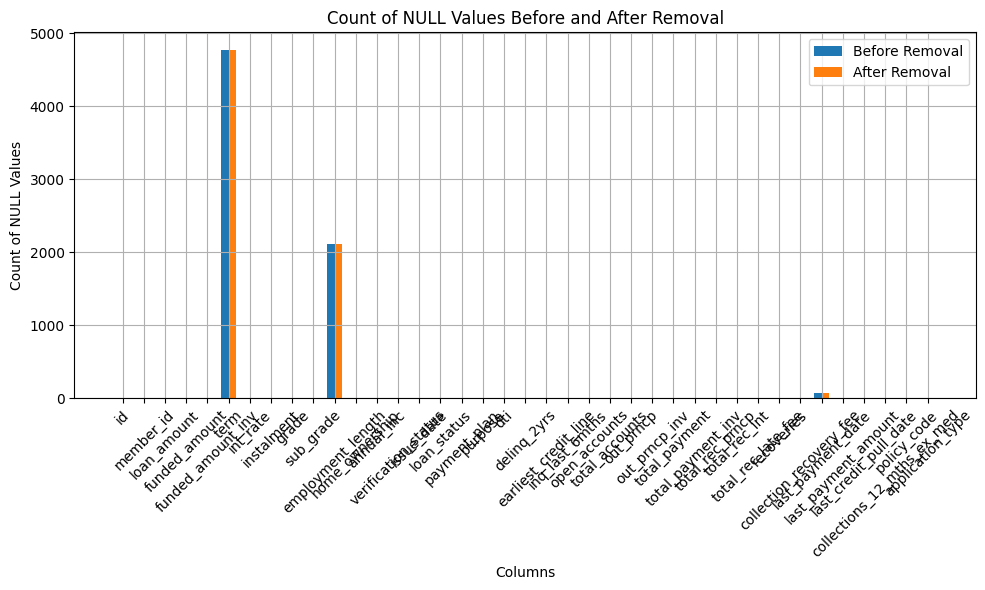

In [4]:
from transformation import Plotter

plotter = Plotter(df)
plotter.plot_null_values()

## Skewed columns

I used the identify_skewed_columns method from my DataFrameTransform class to find columns in the dataset that have skewness greater than 75%. This method gives me a list of these skewed columns, stored in skewed_columns. 

Next, I decided to transform these skewed columns using transform_skewed_columns. This method applies a transformation to numeric columns that exhibit skewness over teh 75% mentioned before. 

Finally, I printed out skewed_columns to see which columns were identified as skewed. This step helps me understand which columns require transformation based on their skewness levels.

In [5]:
print(dir(transformer))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'apply_transformation', 'check_null_values', 'check_null_values_after', 'compute_correlation_matrix', 'data_frame', 'drop_columns', 'find_best_transformation', 'identify_skewed_columns', 'impute_missing_values', 'plot_outliers', 'remove_highly_correlated_columns', 'remove_outliers', 'save_dataframe', 'testing_import', 'transform_skewed_columns', 'visualize_after_outliers_removal', 'visualize_correlation_matrix', 'visualize_skewness']


Identified skewed columns:
['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


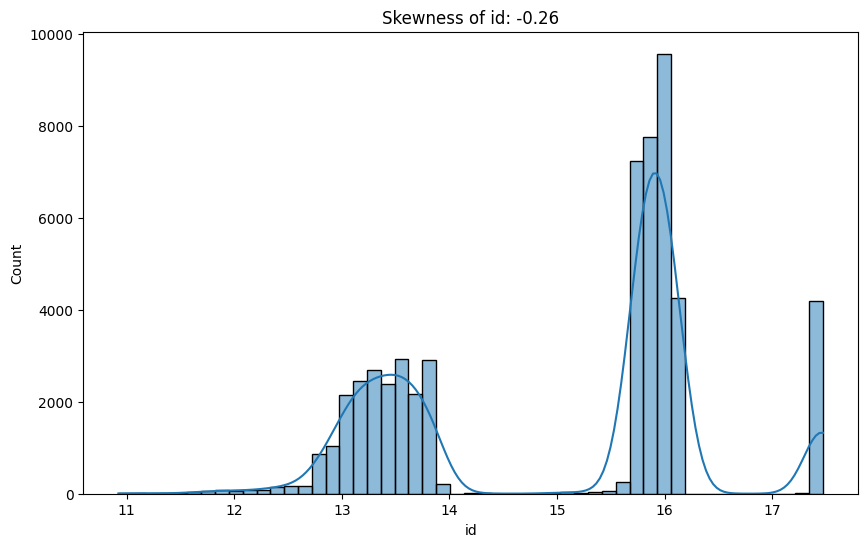

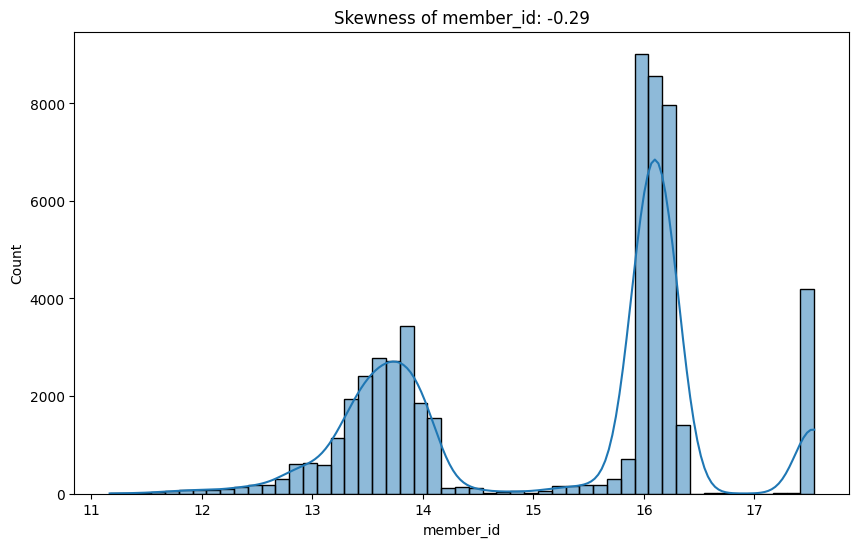

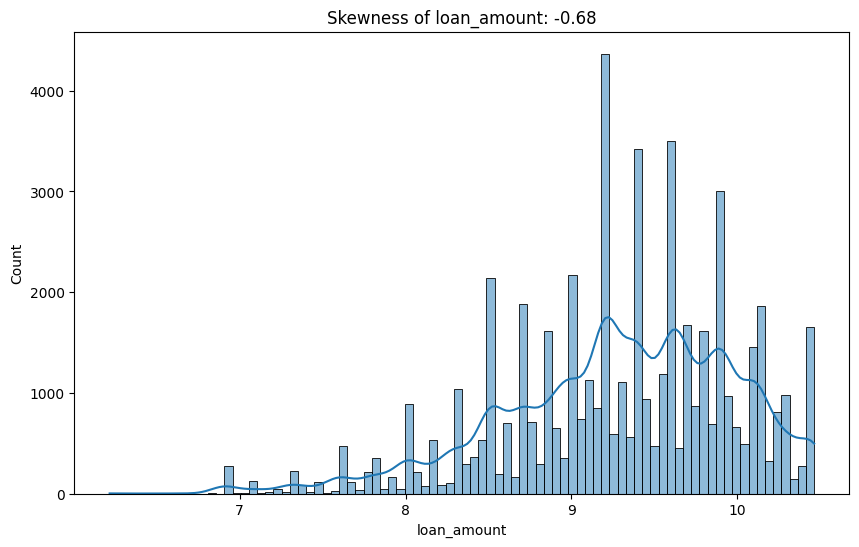

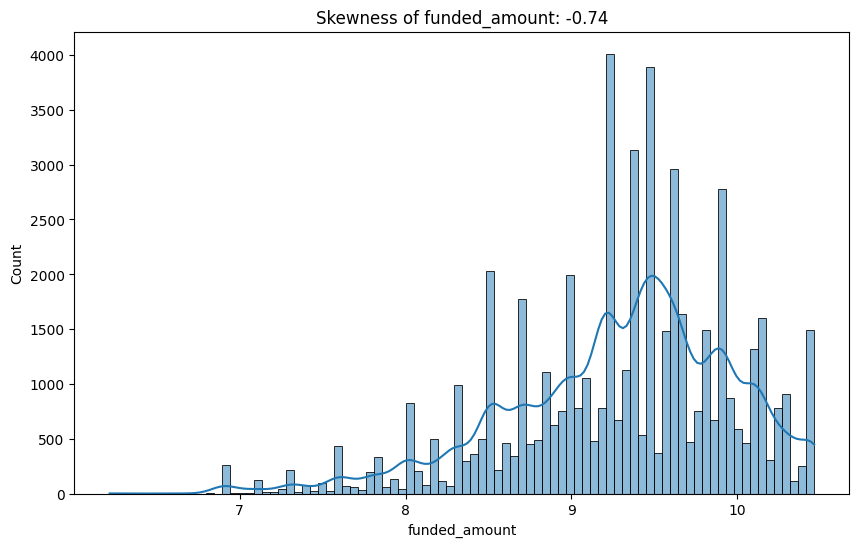

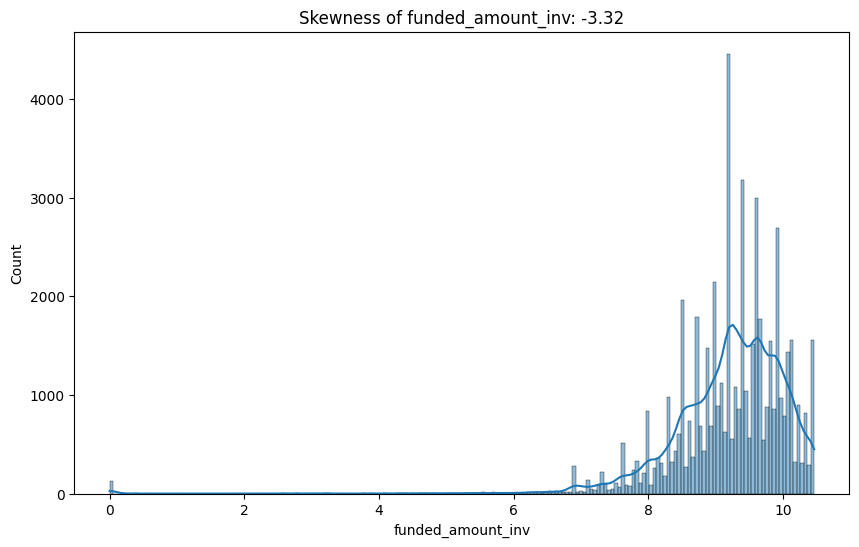

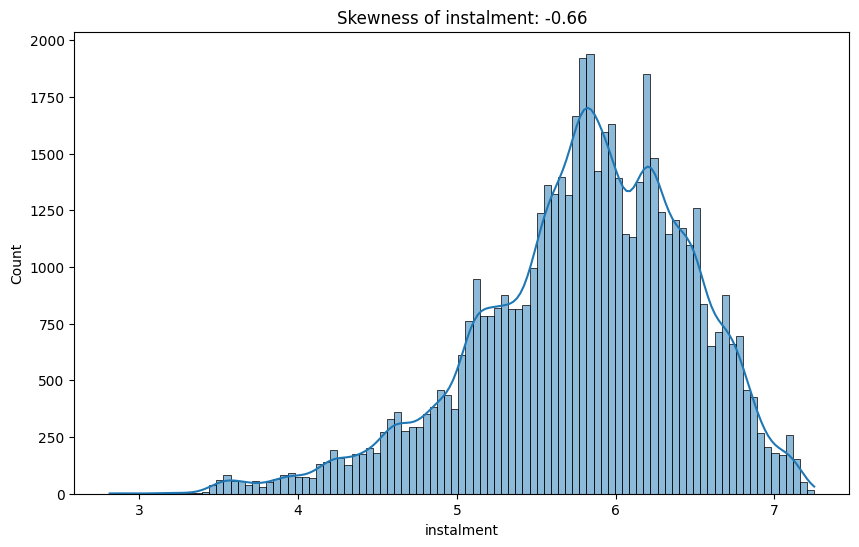

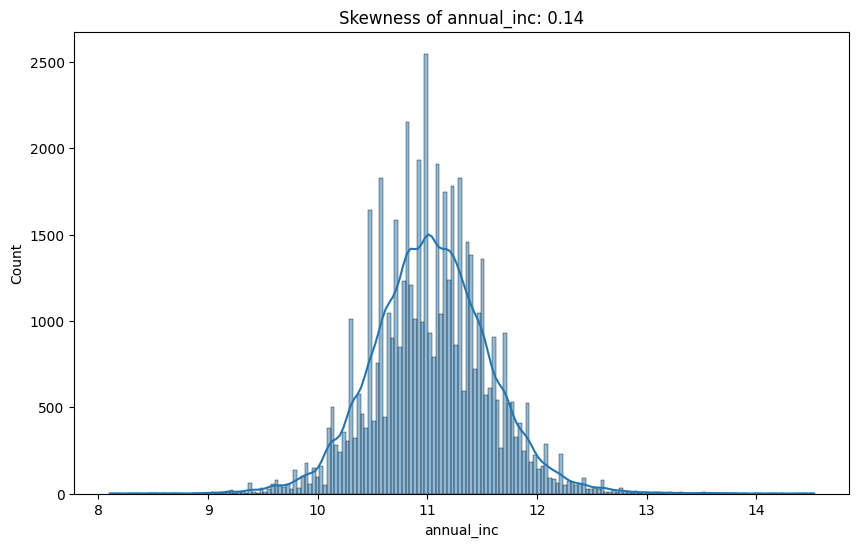

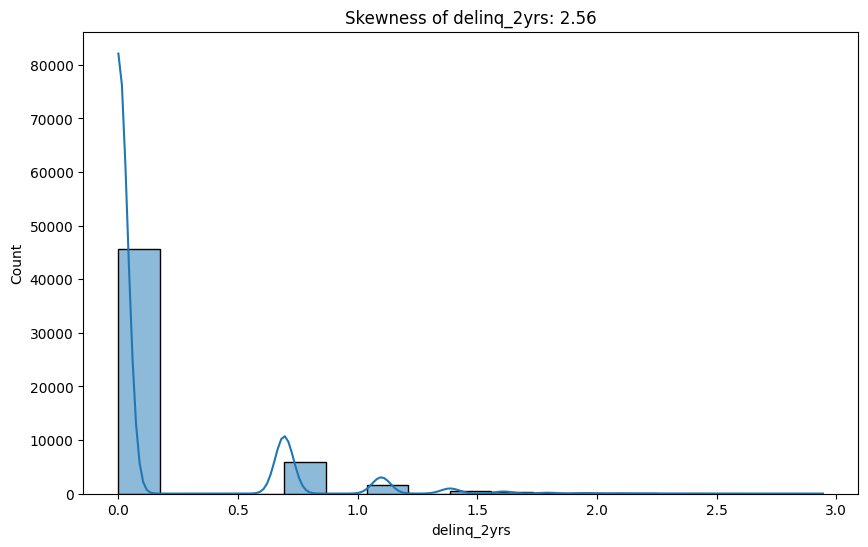

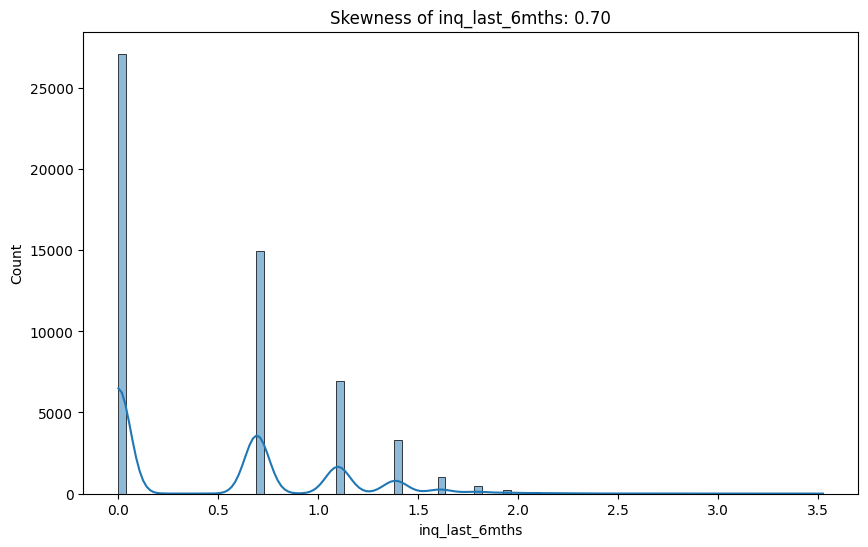

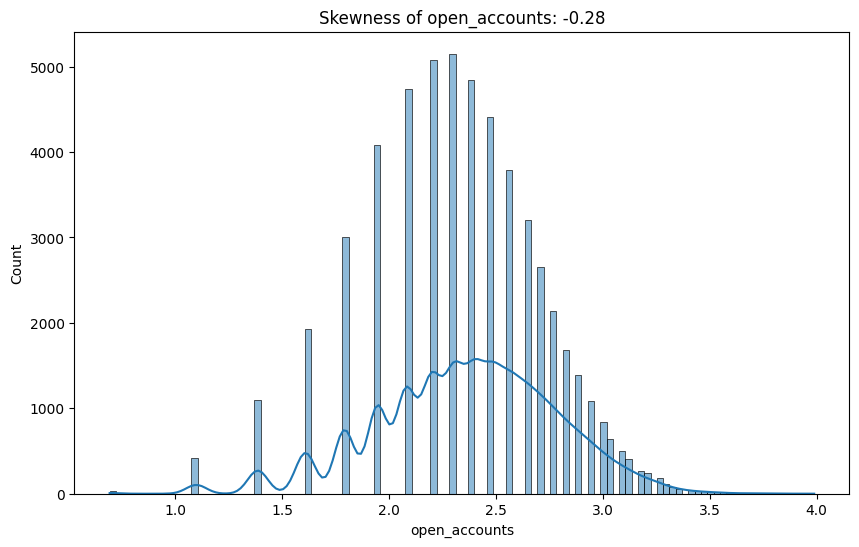

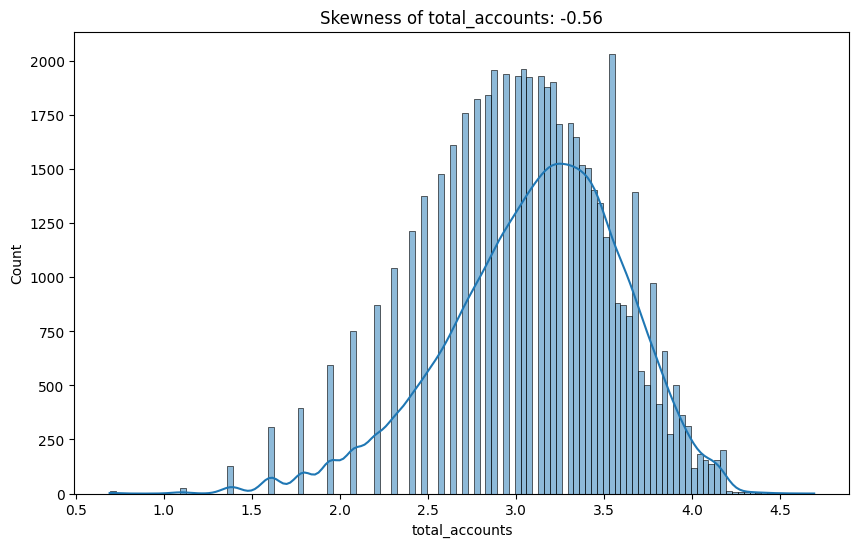

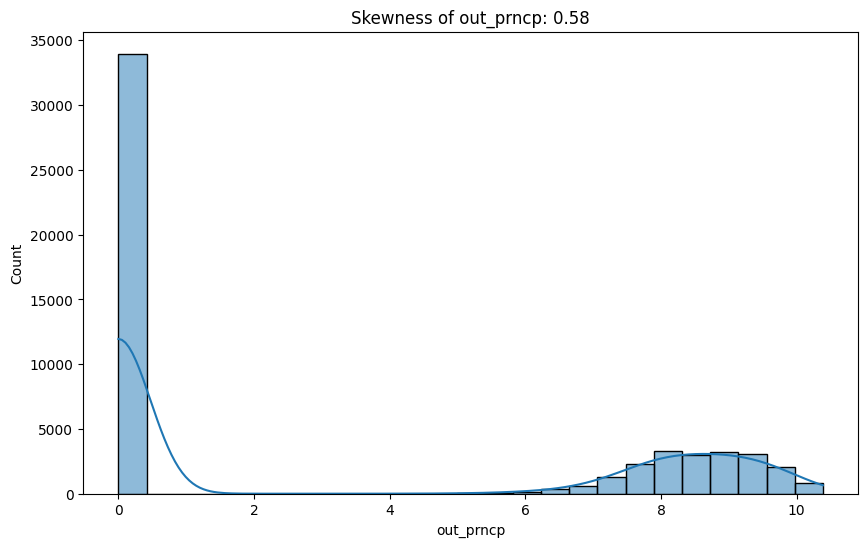

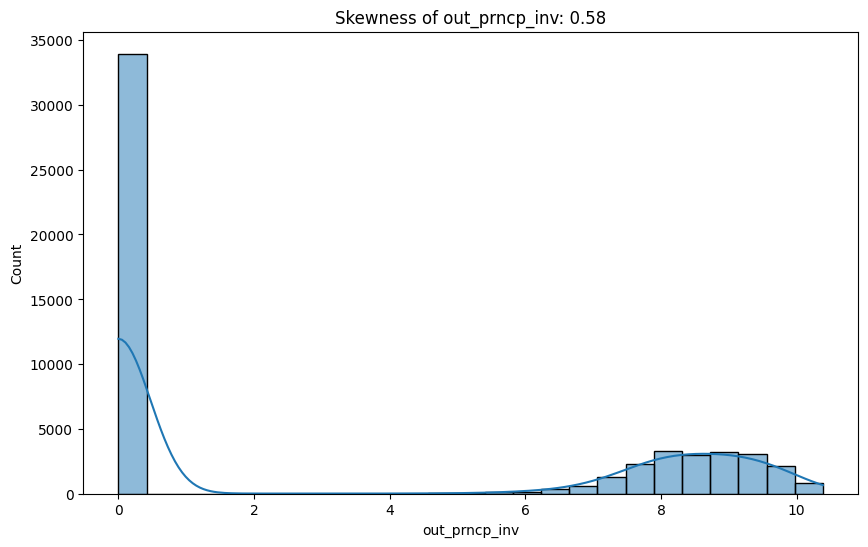

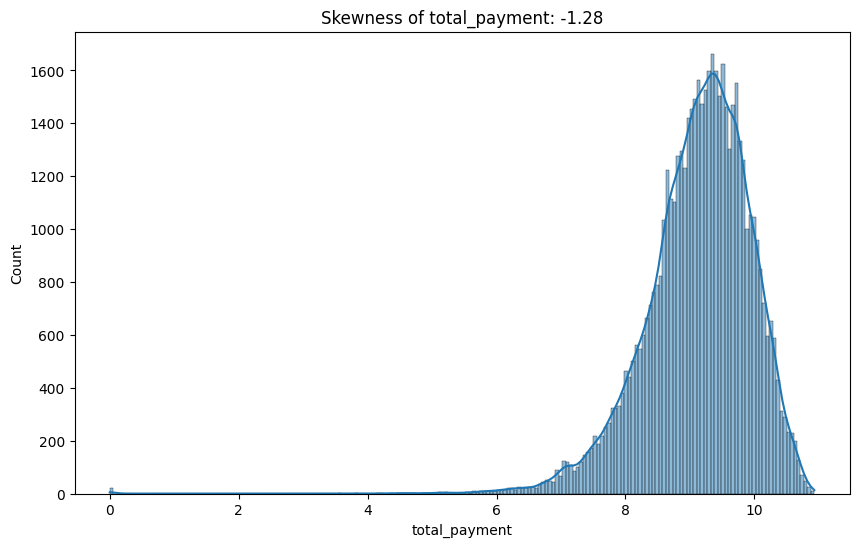

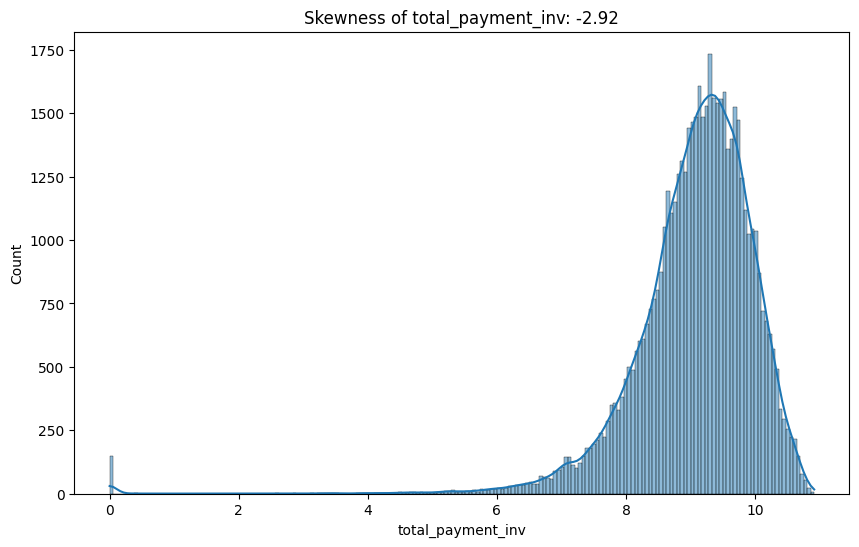

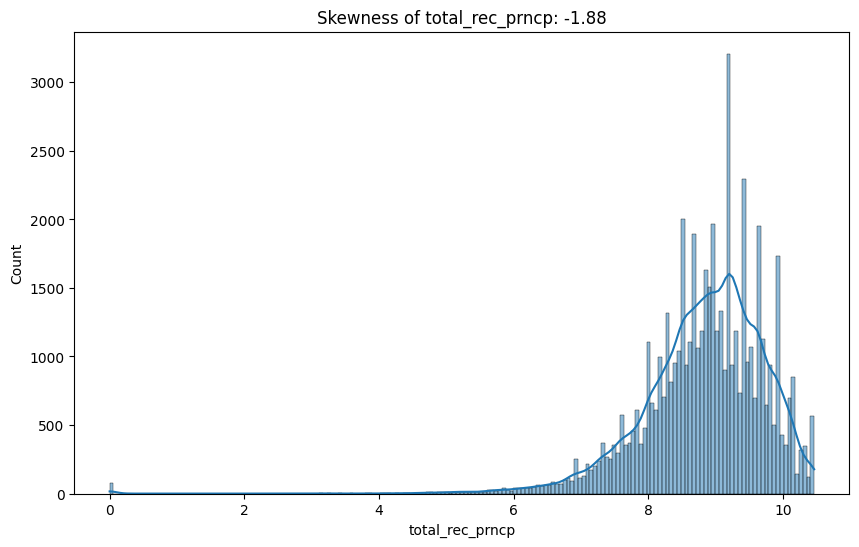

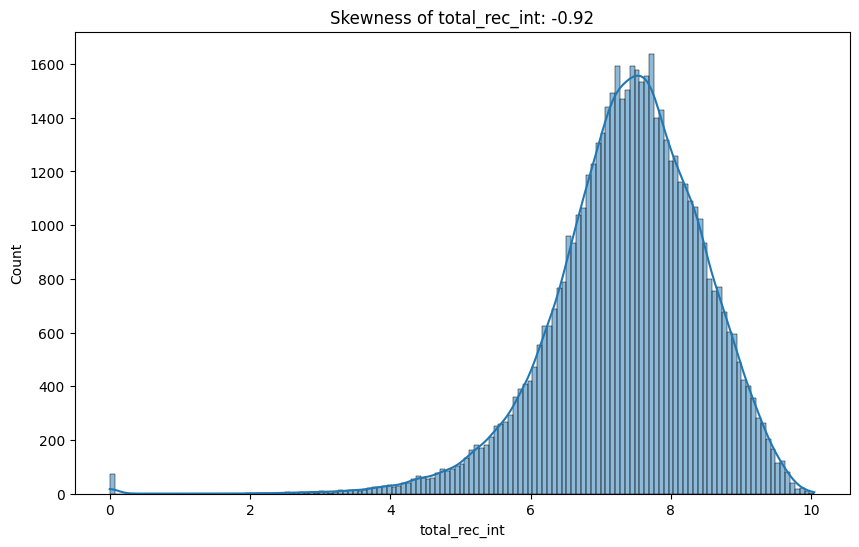

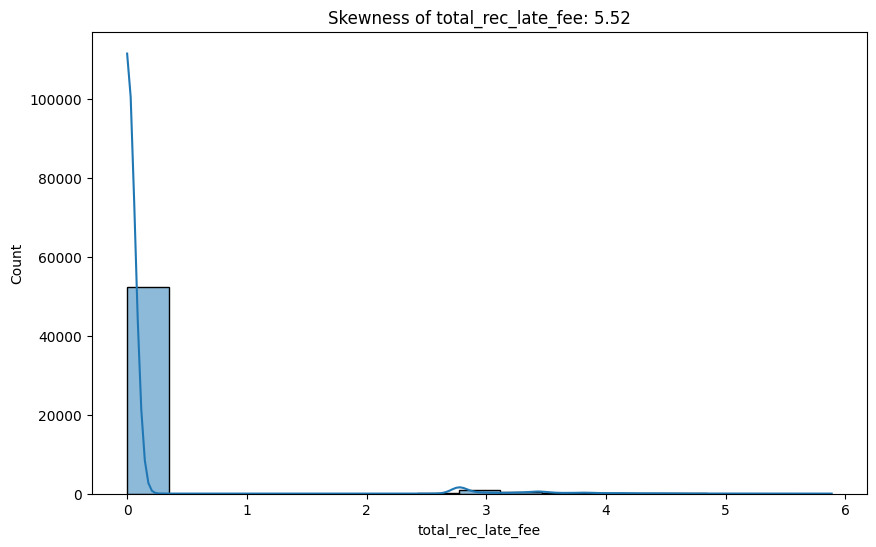

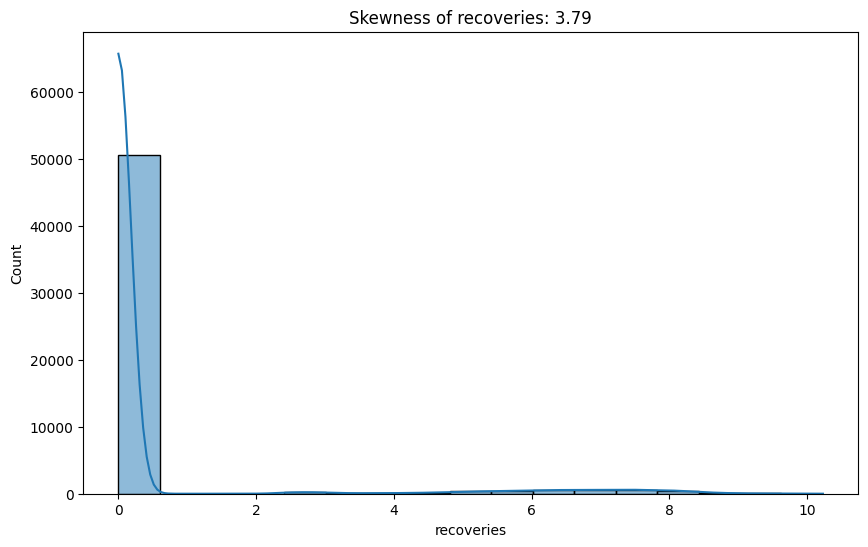

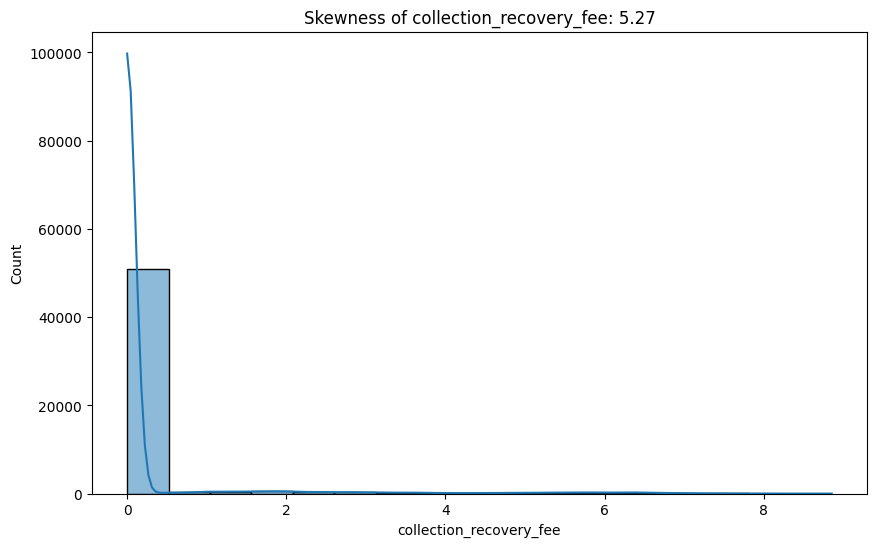

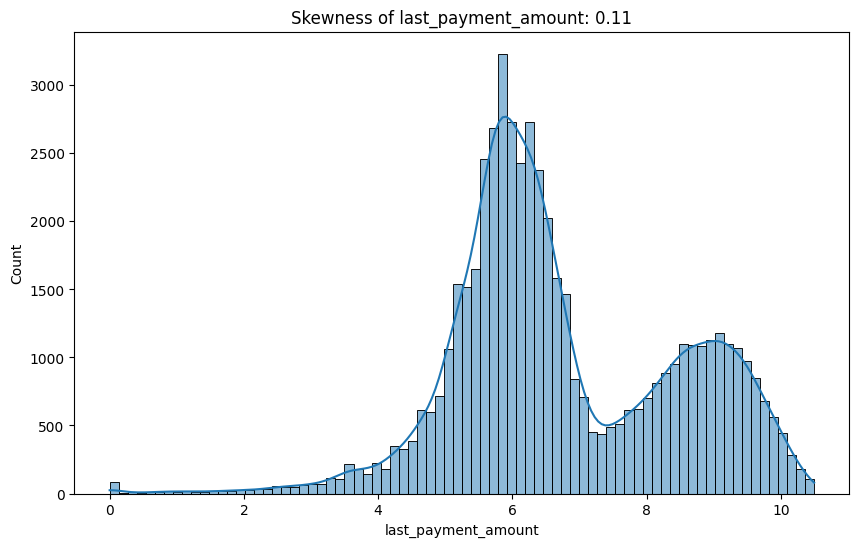

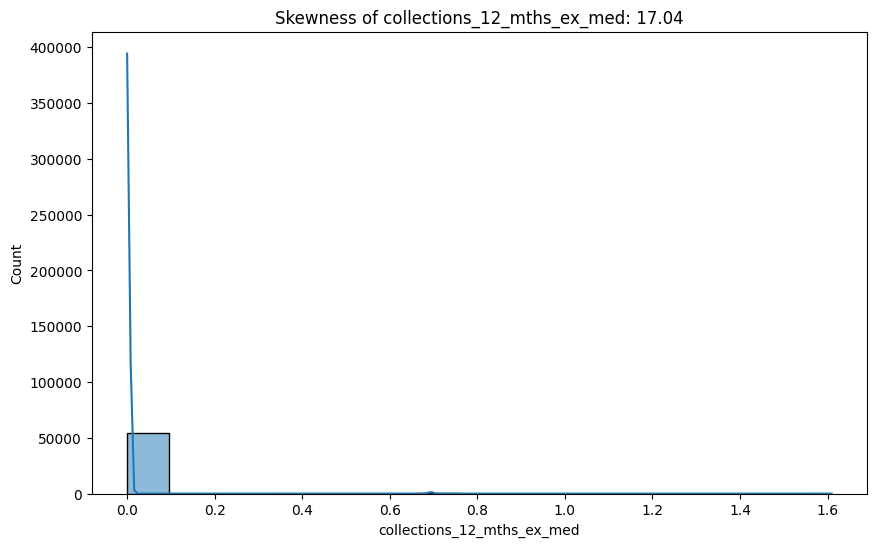

In [6]:
skewed_columns = transformer.identify_skewed_columns()
print("Identified skewed columns:")
print(skewed_columns)

transformer.transform_skewed_columns(skewed_columns)
transformer.visualize_skewness(skewed_columns)
transformer.save_dataframe('transformed_loan_payments.csv')

## Remove outliers

Here I aim to identify the outlier and remove them by adding functions to the DataTransform and the Plotter class.

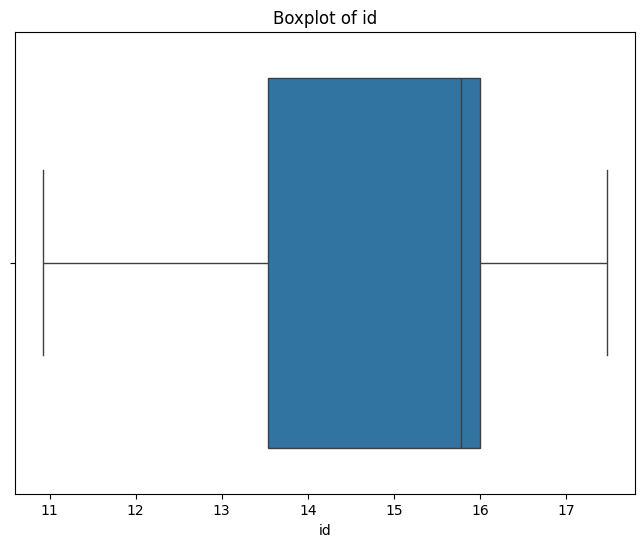

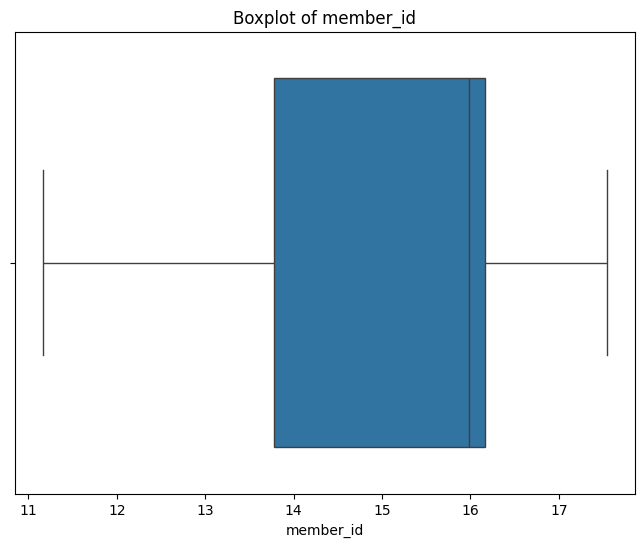

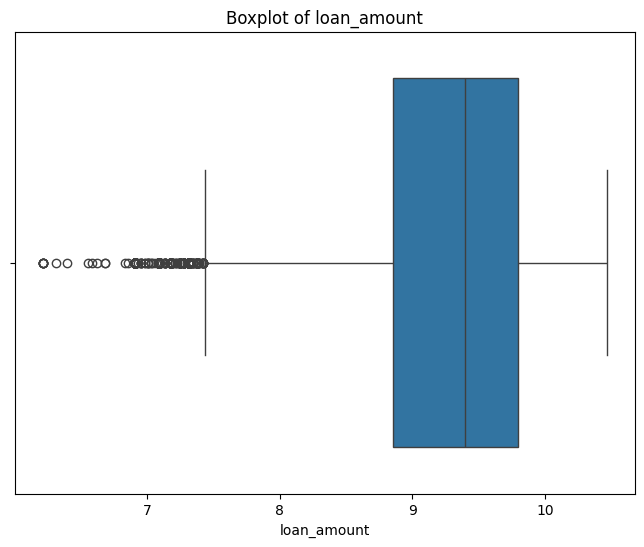

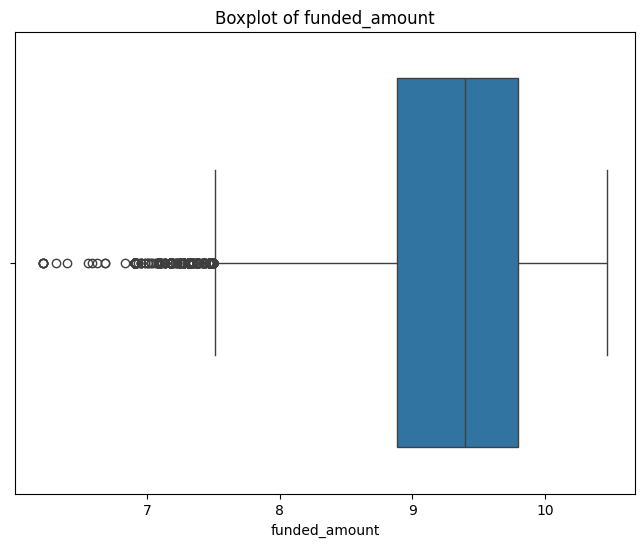

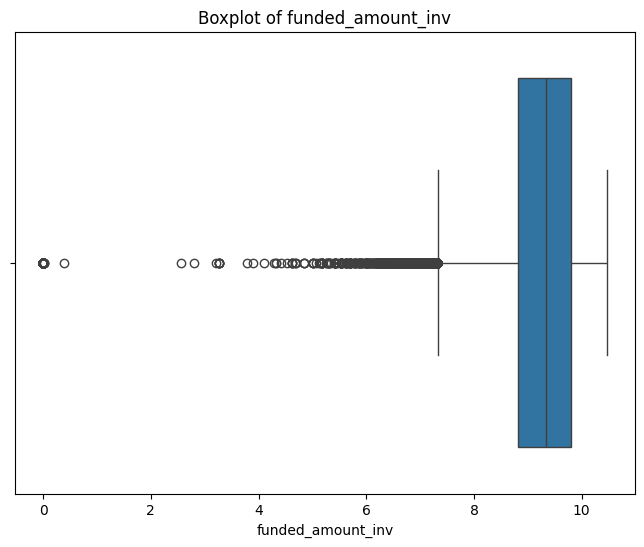

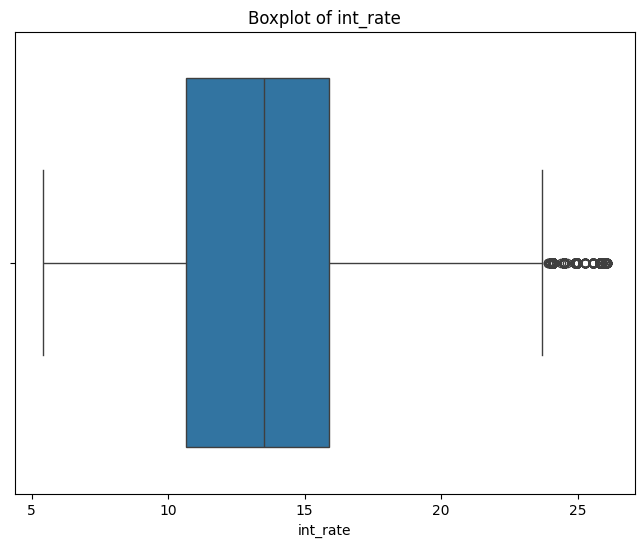

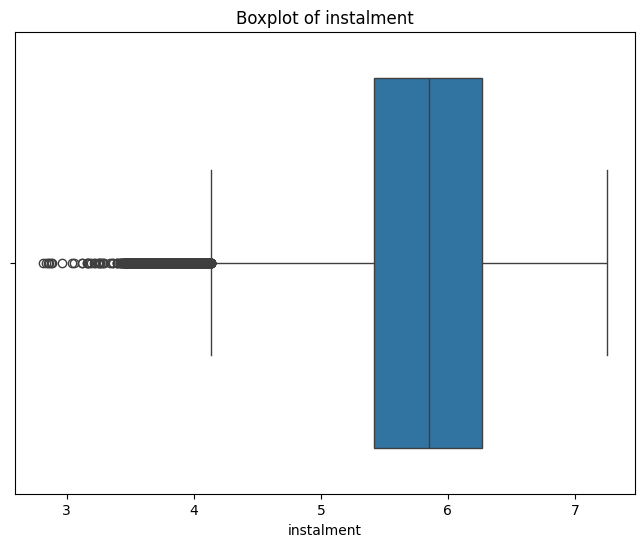

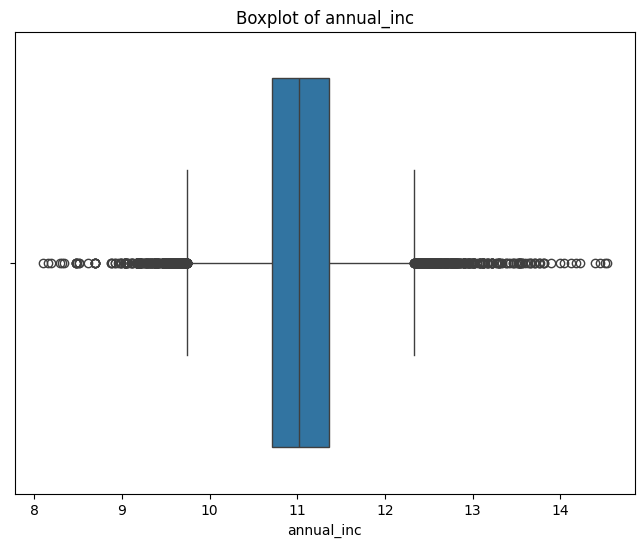

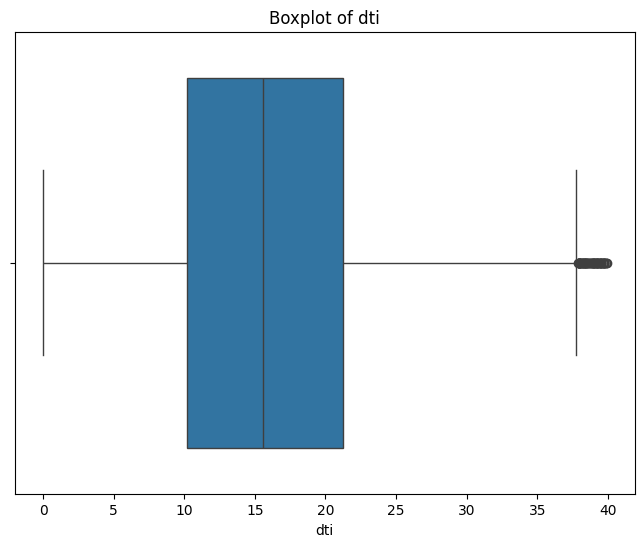

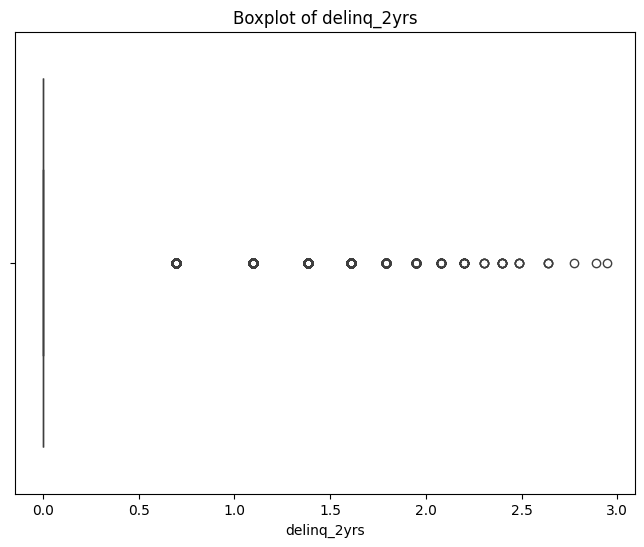

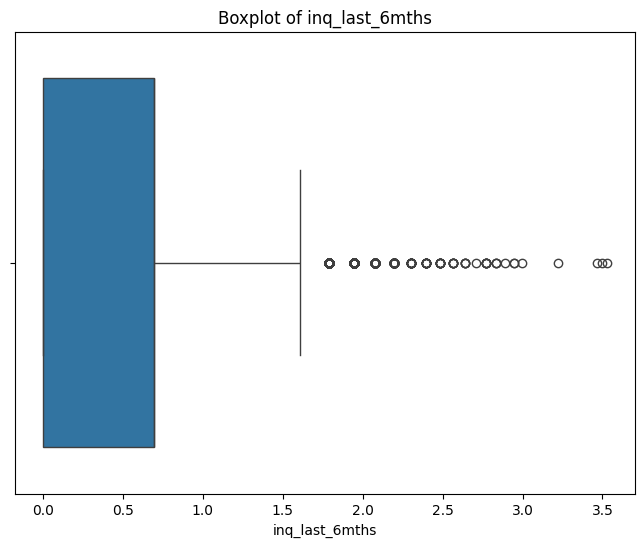

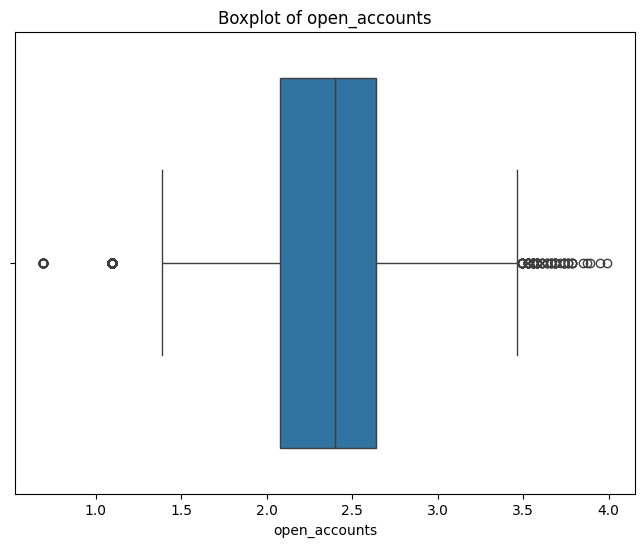

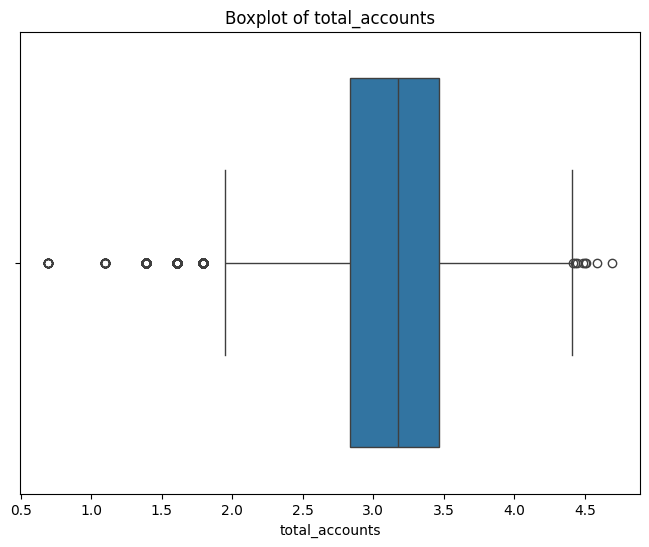

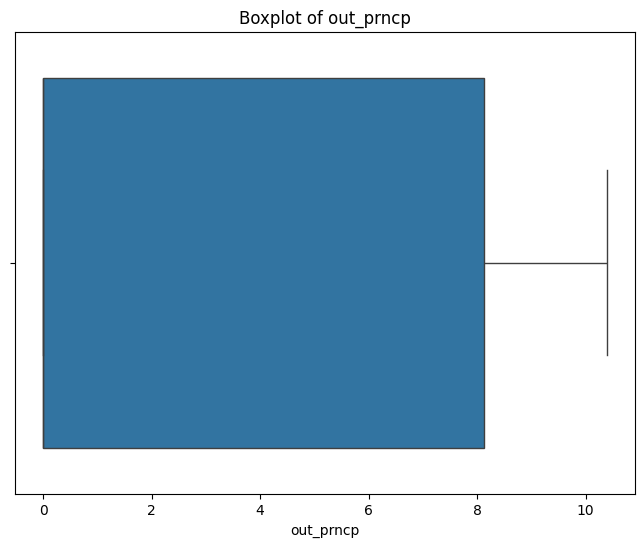

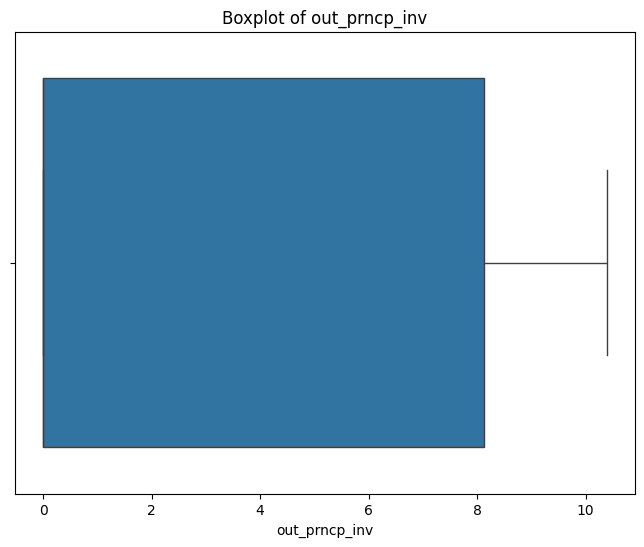

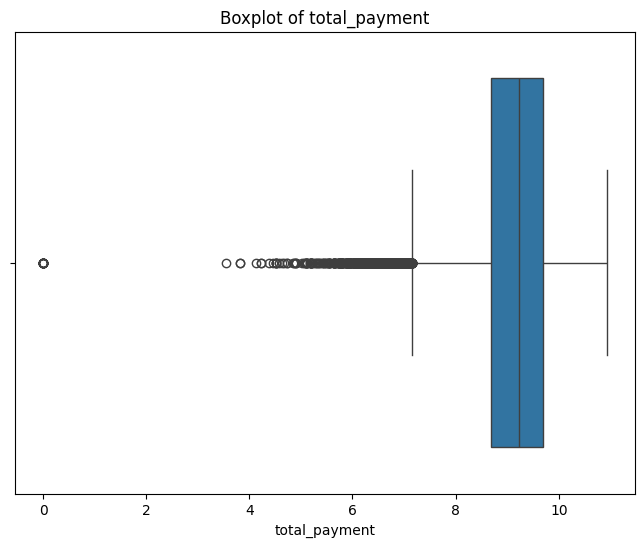

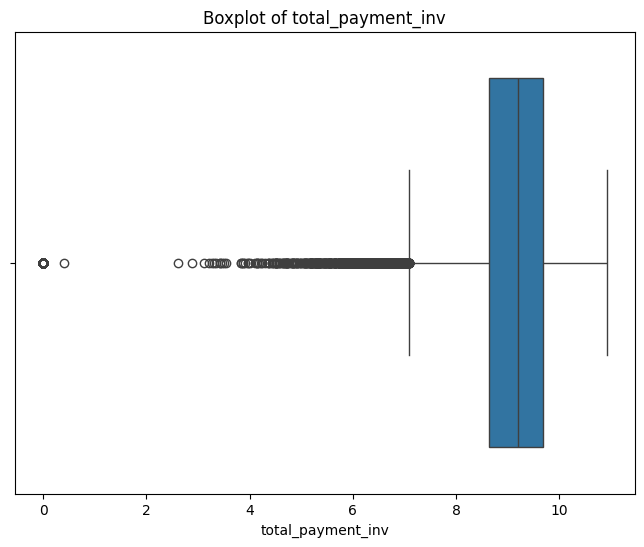

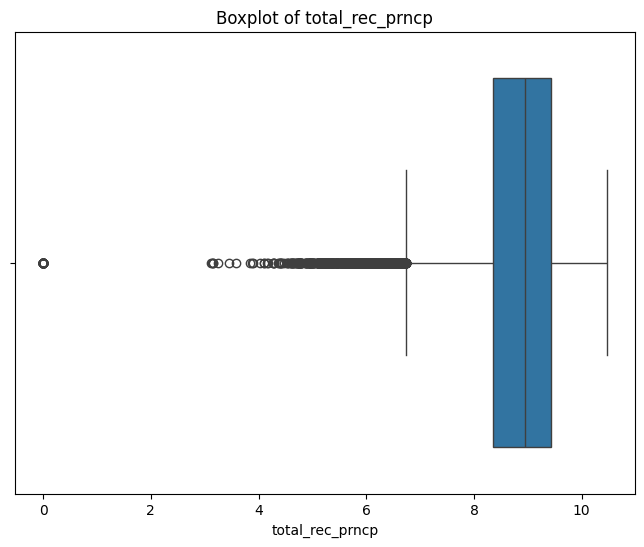

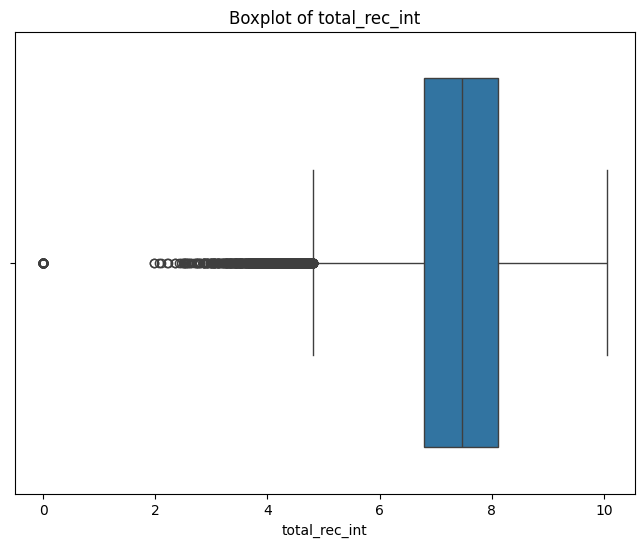

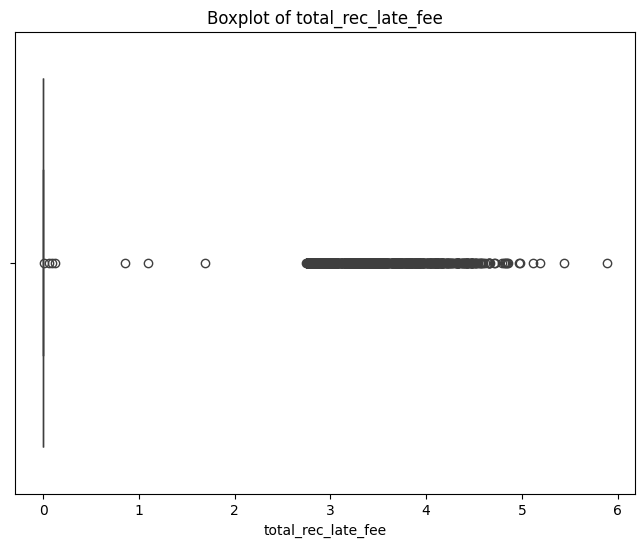

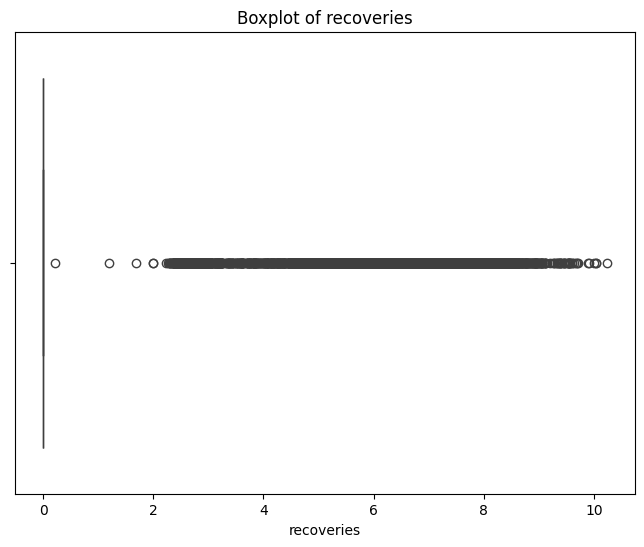

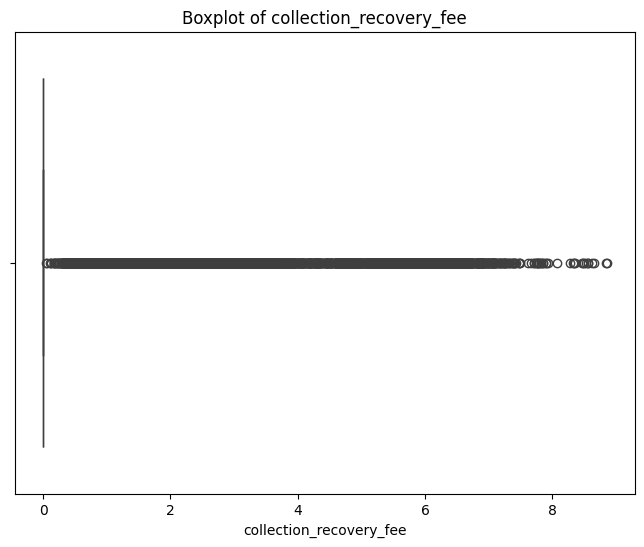

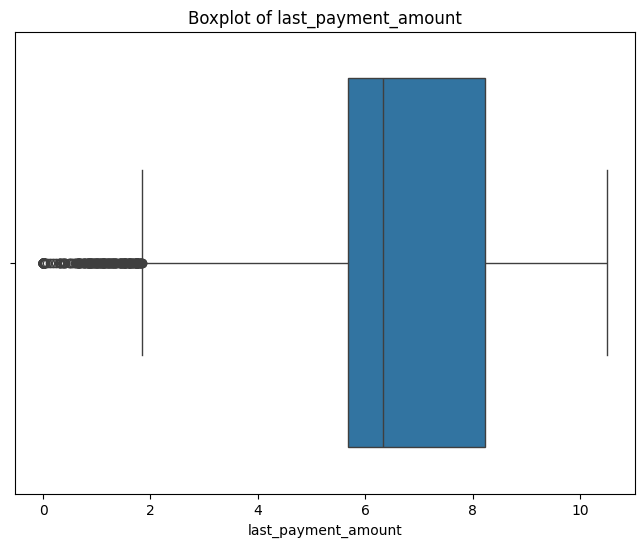

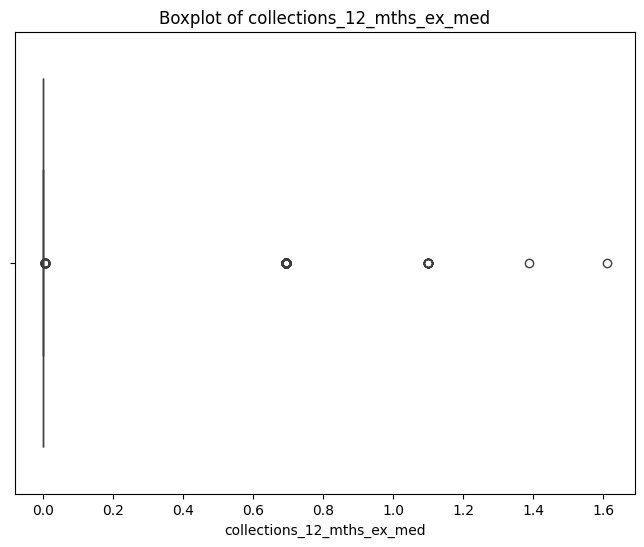

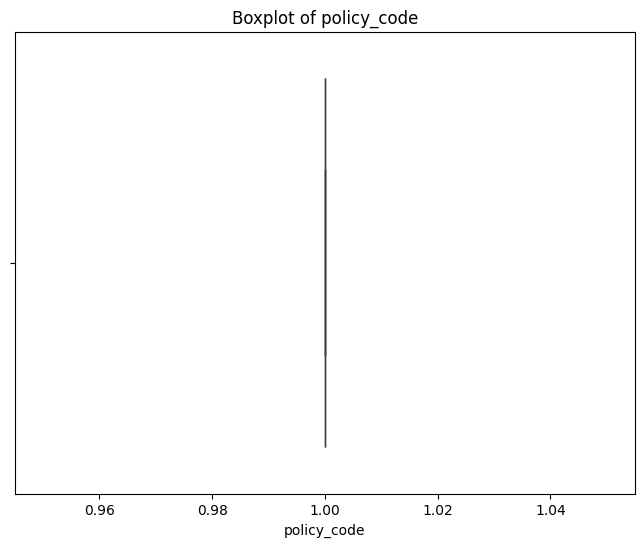

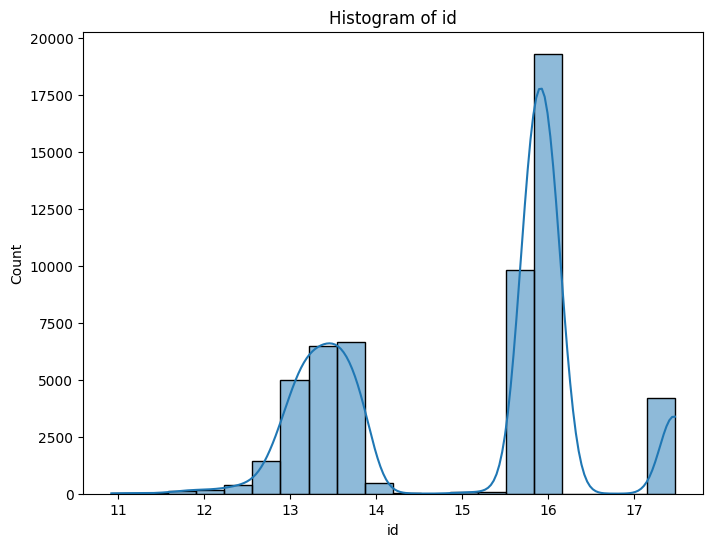

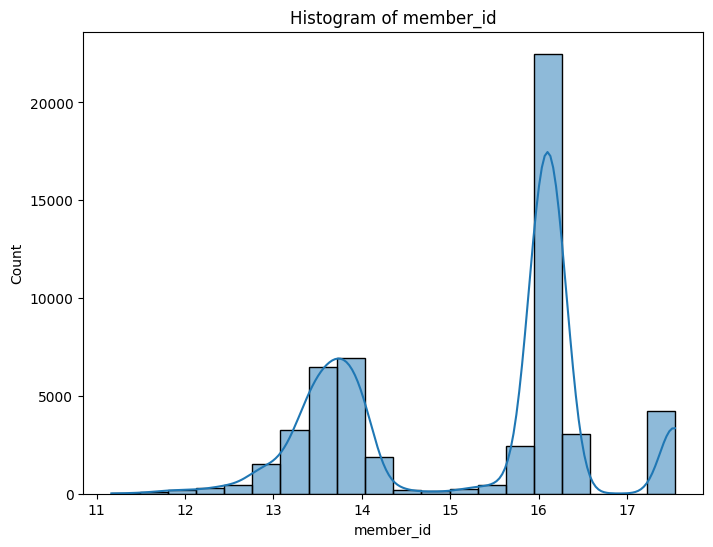

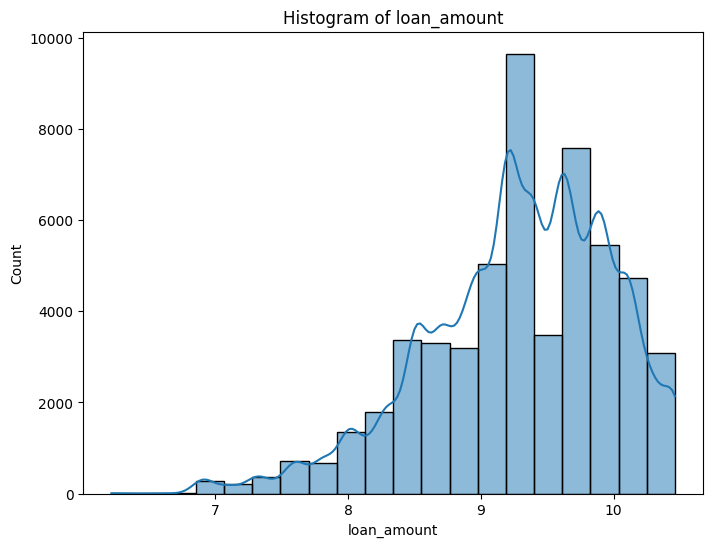

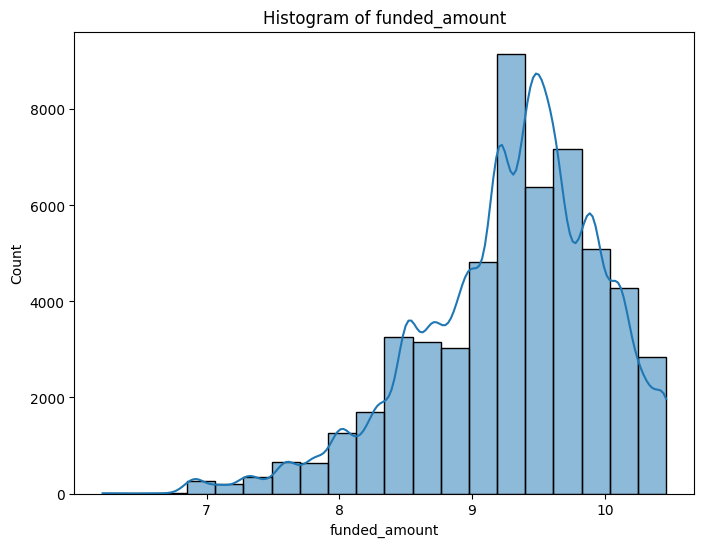

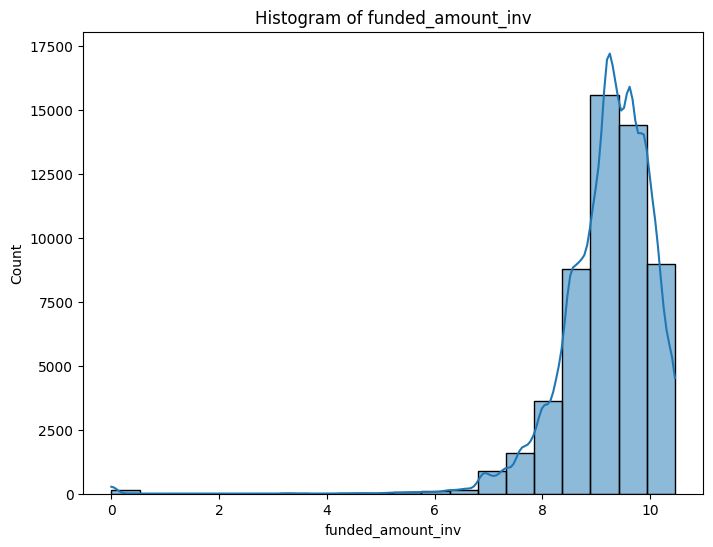

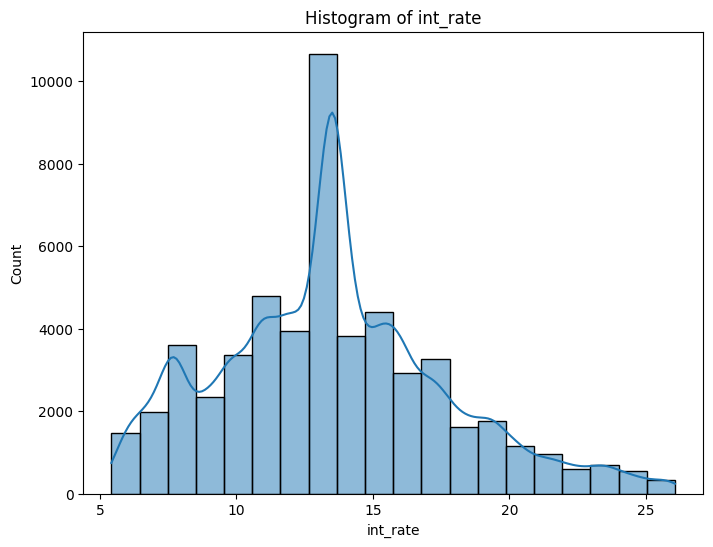

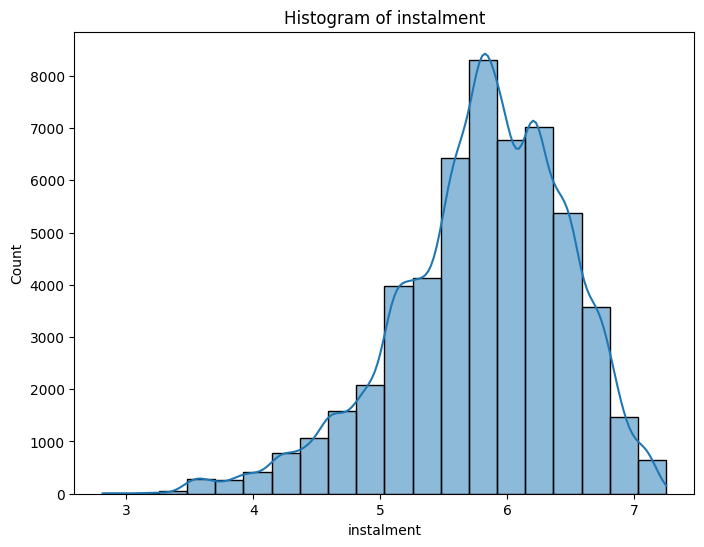

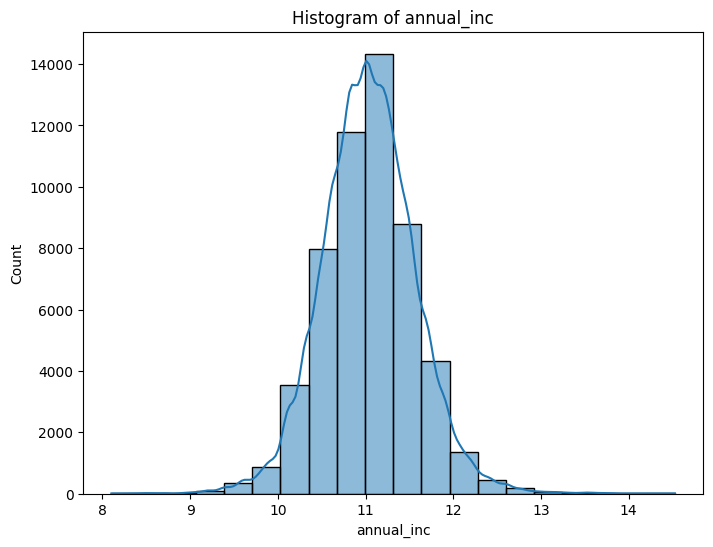

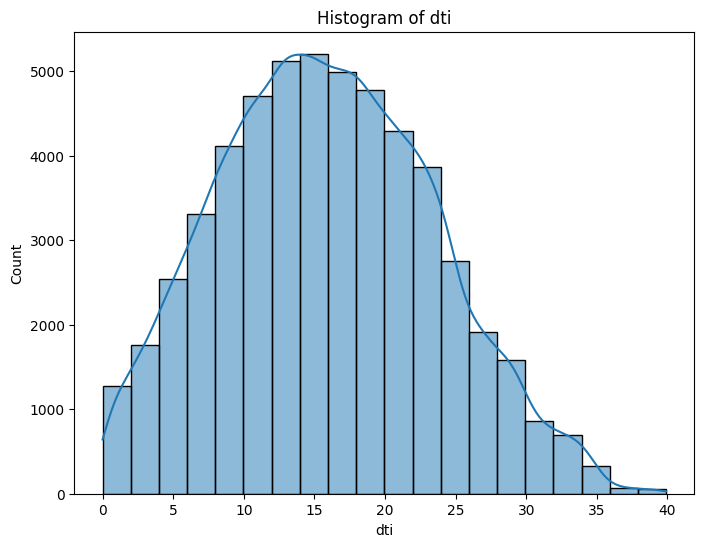

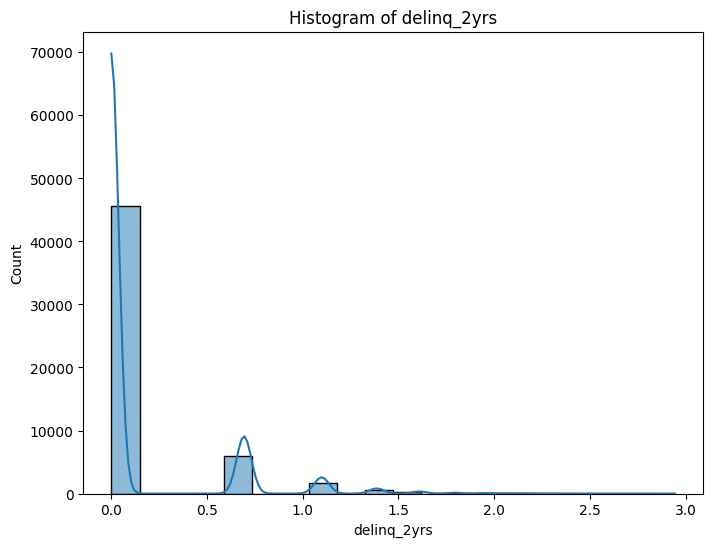

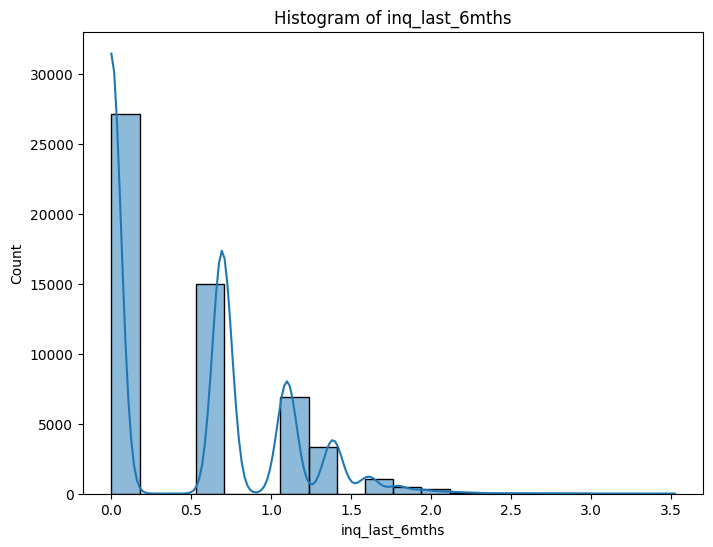

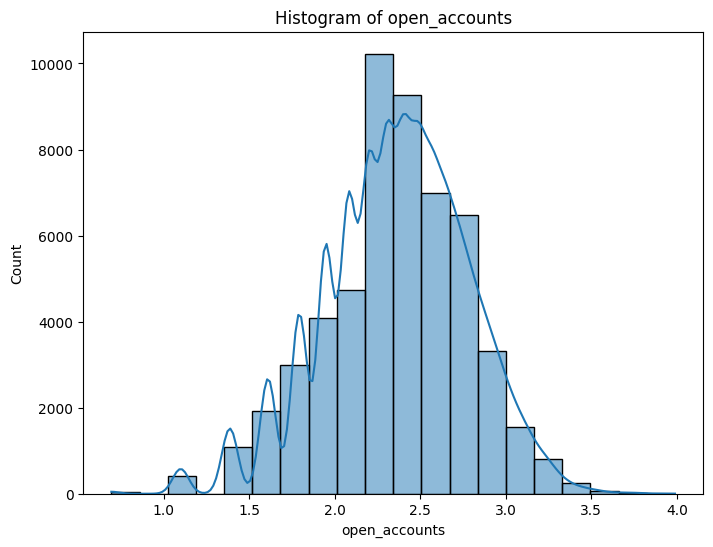

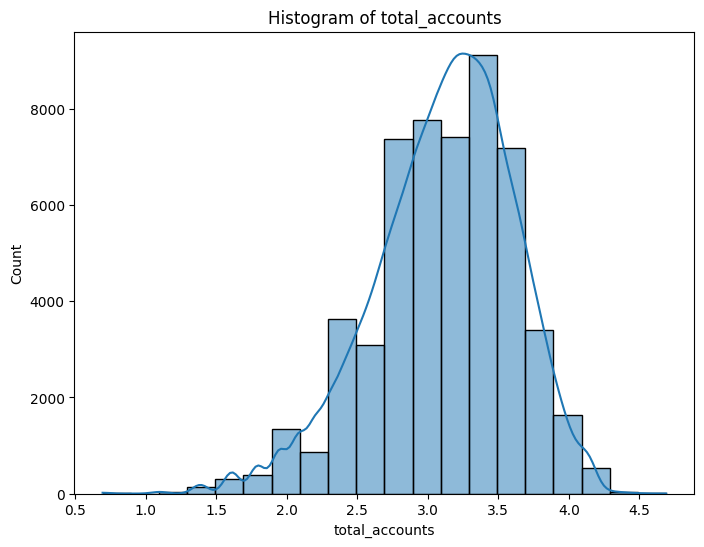

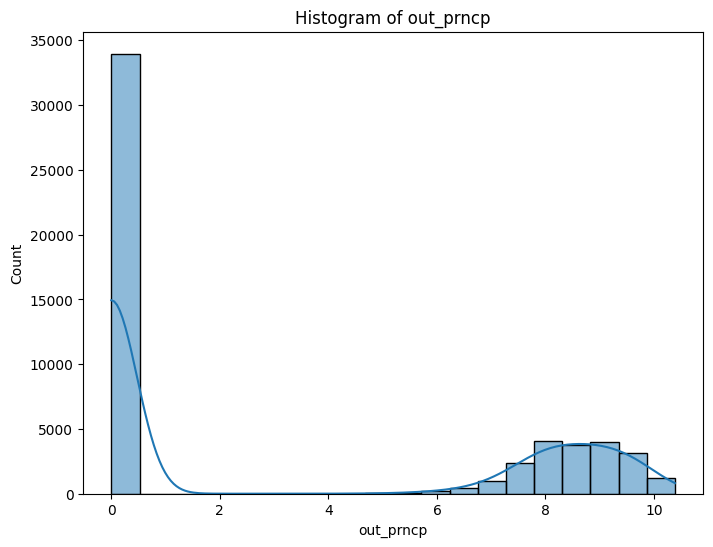

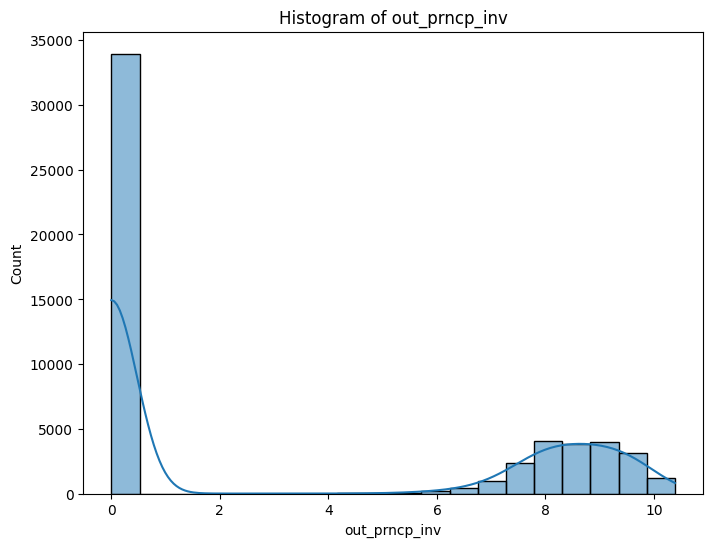

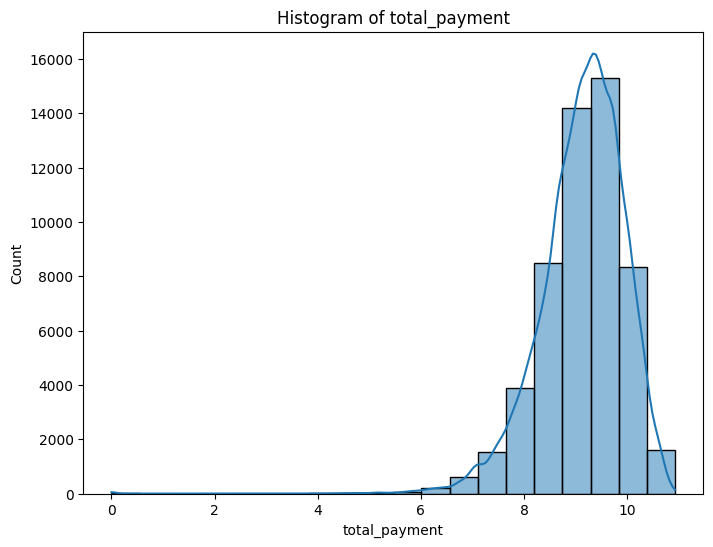

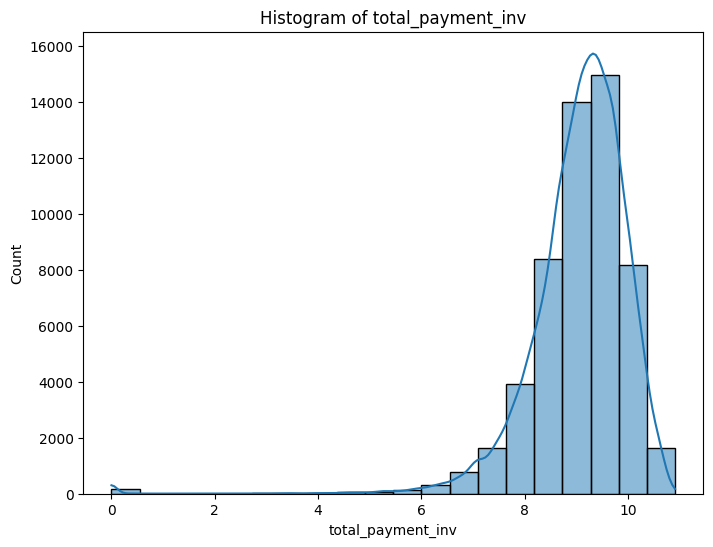

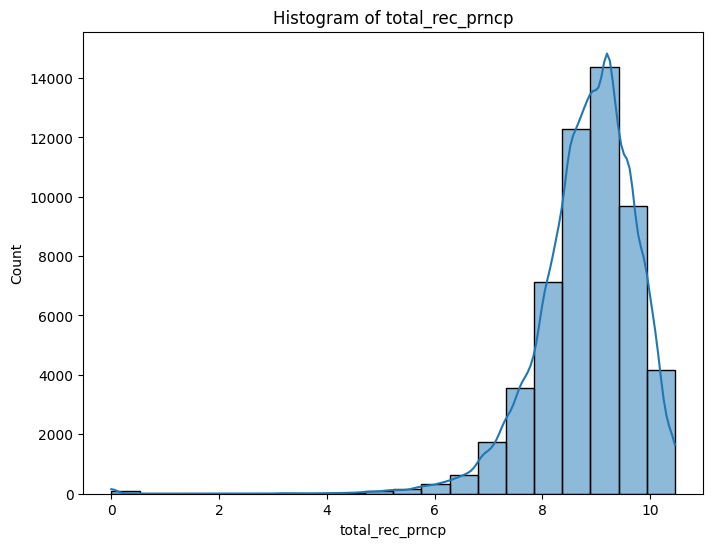

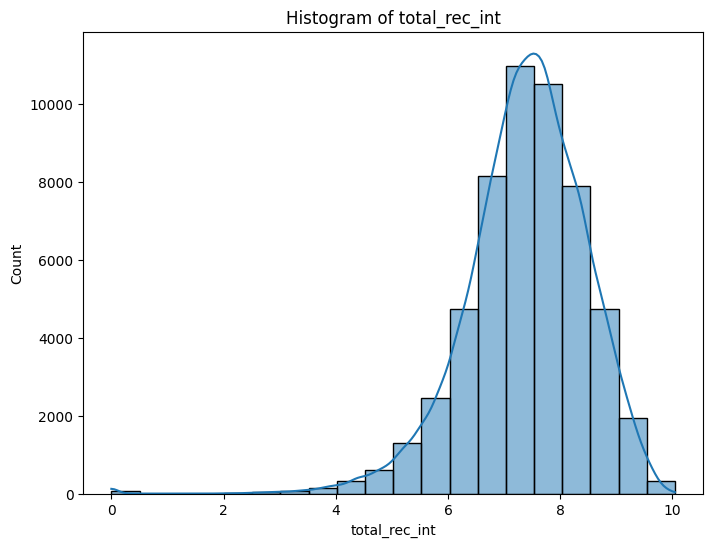

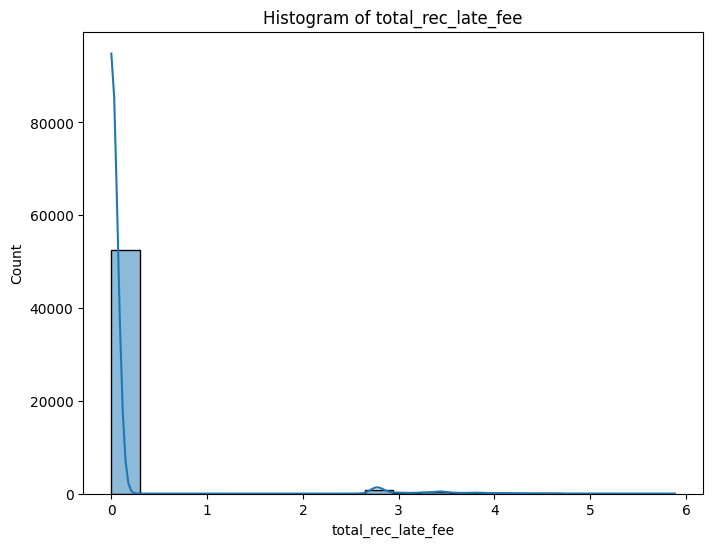

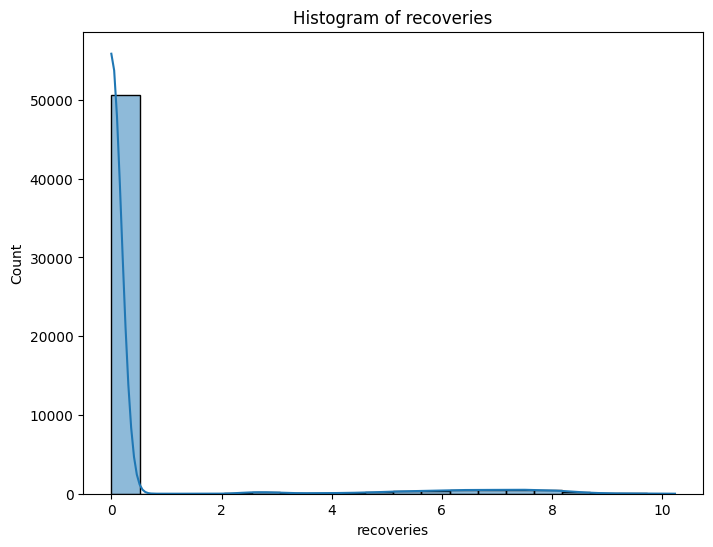

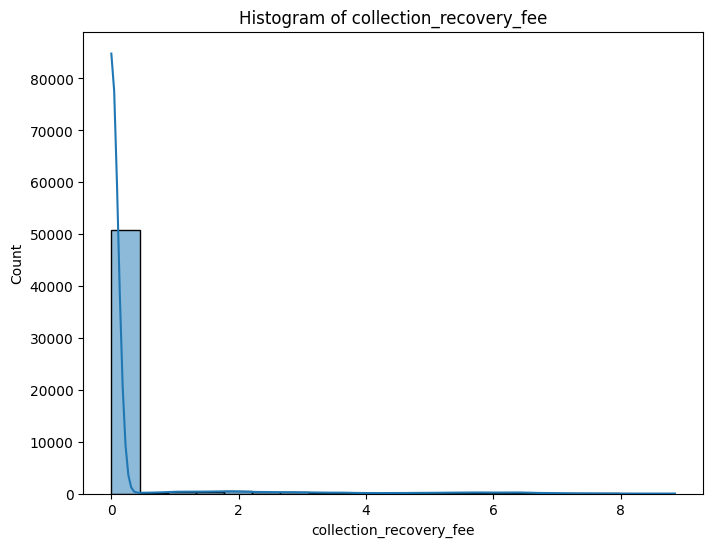

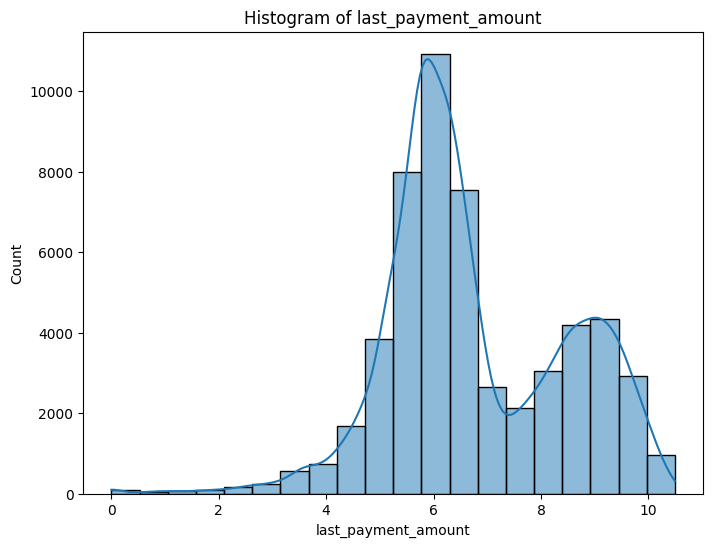

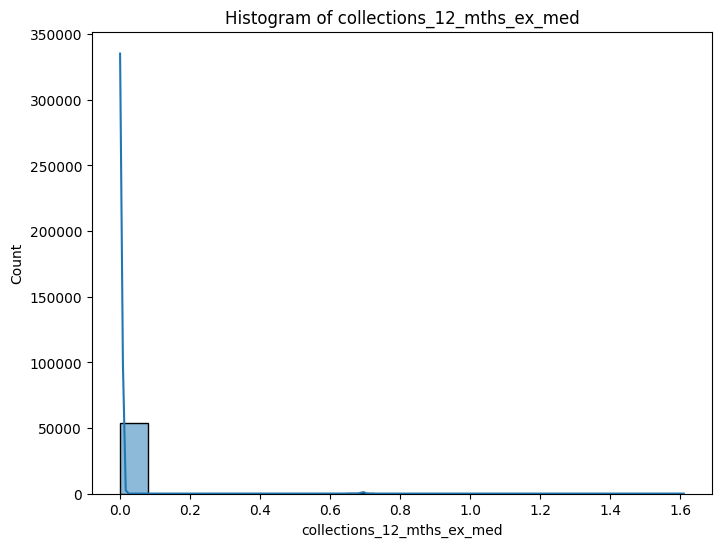

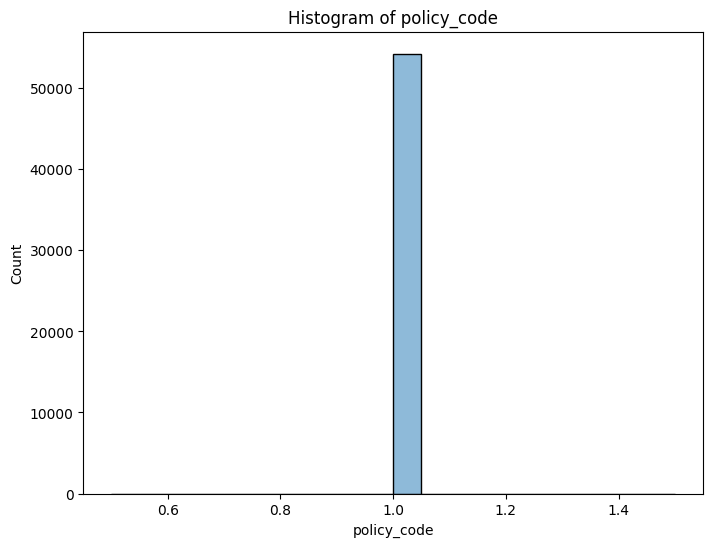

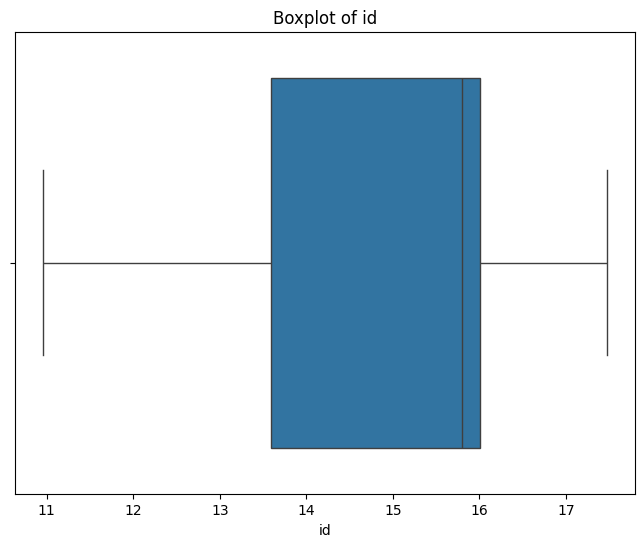

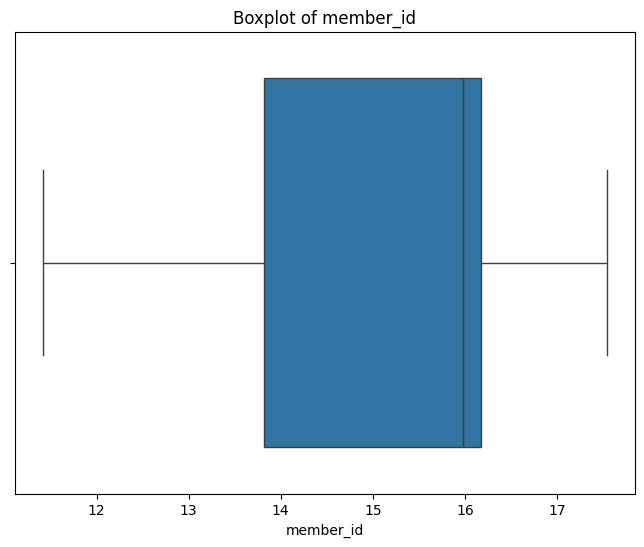

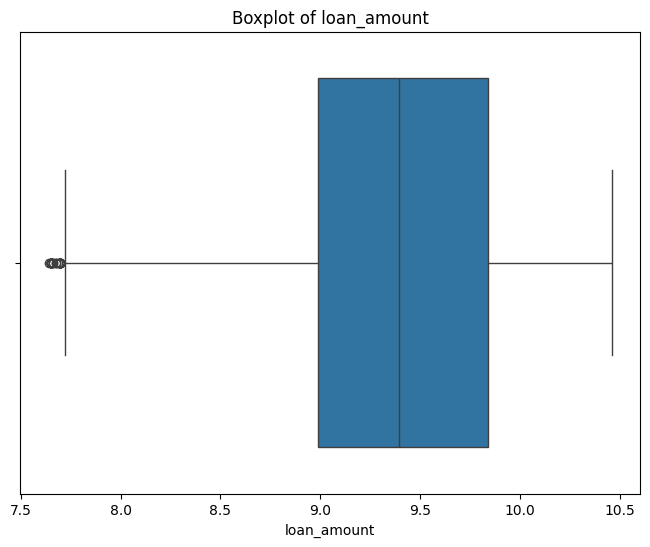

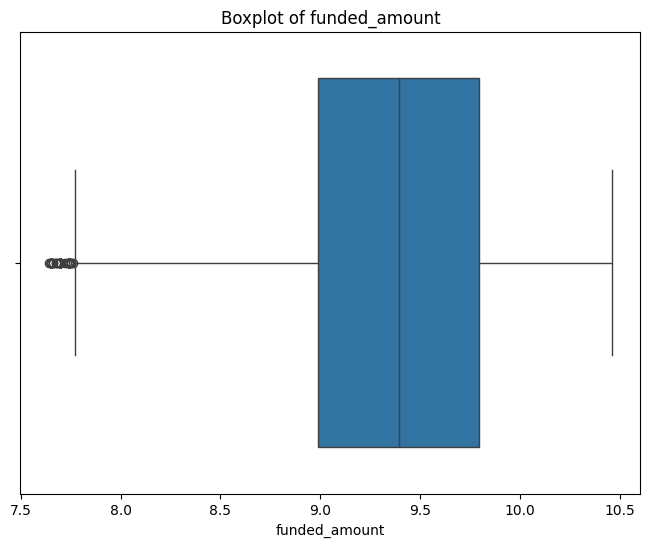

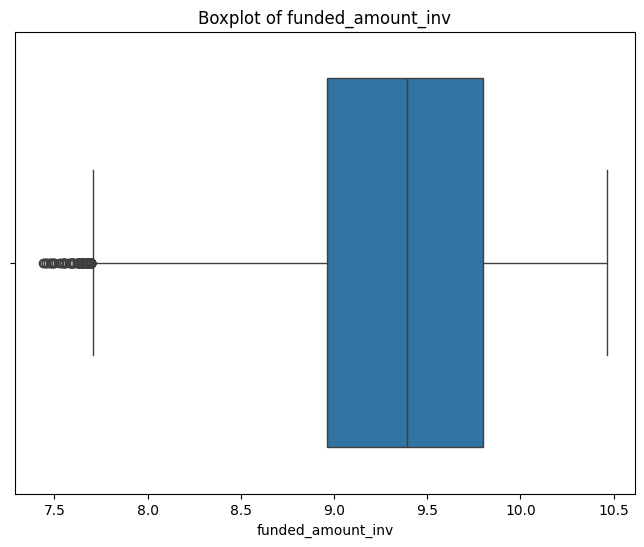

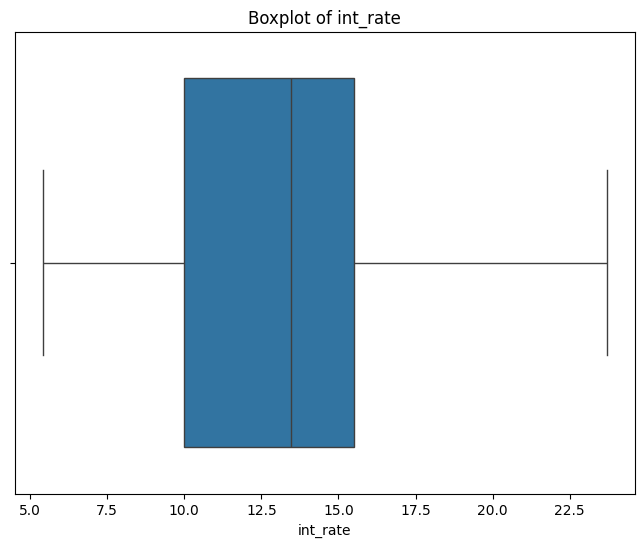

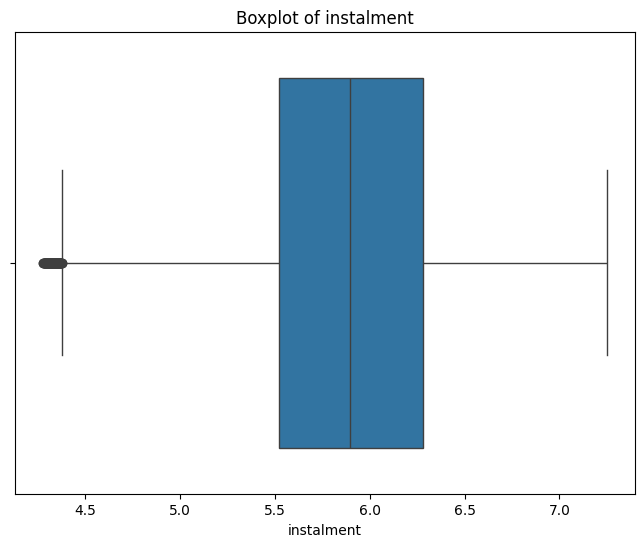

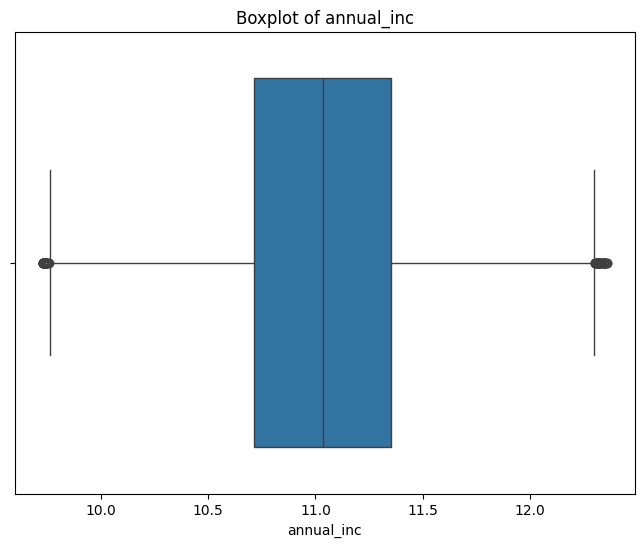

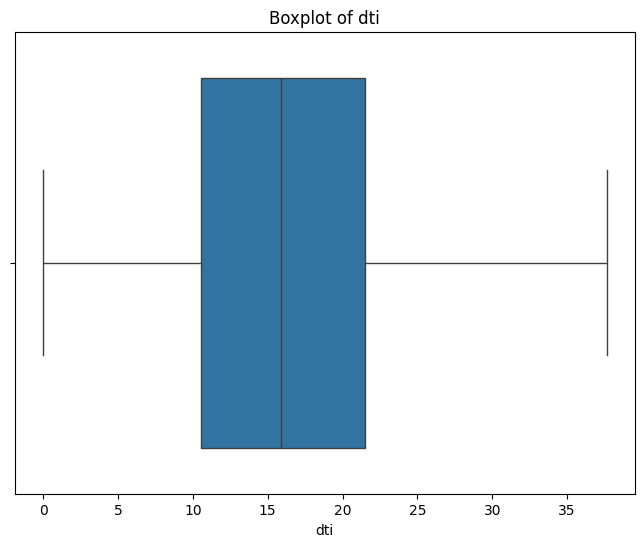

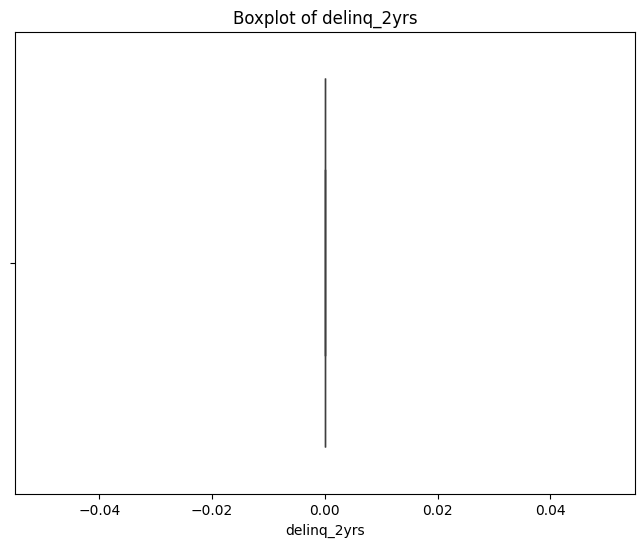

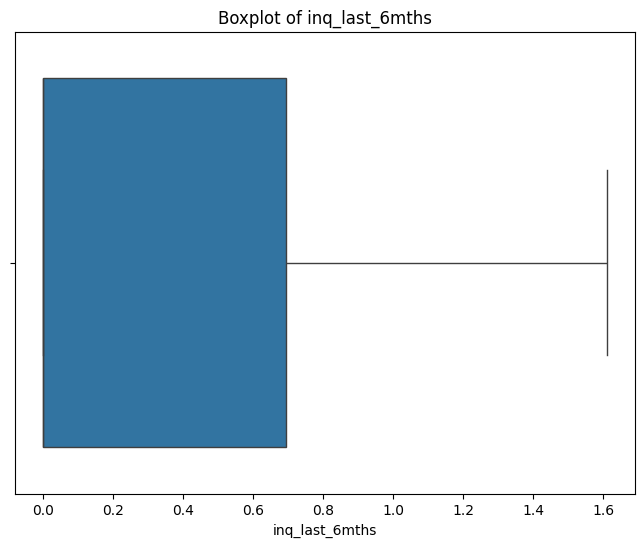

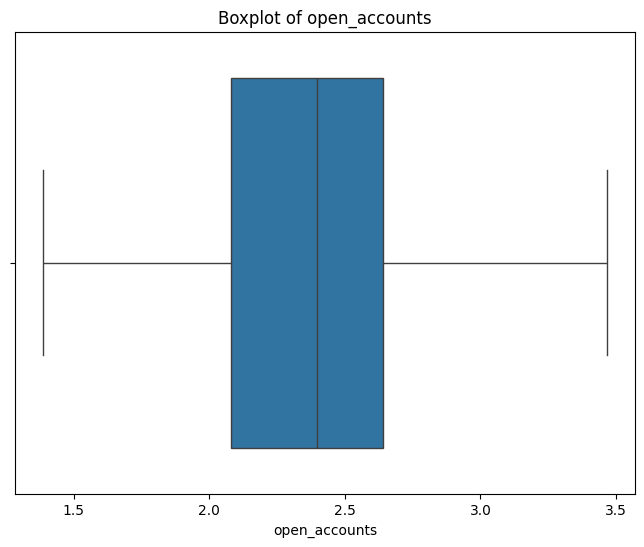

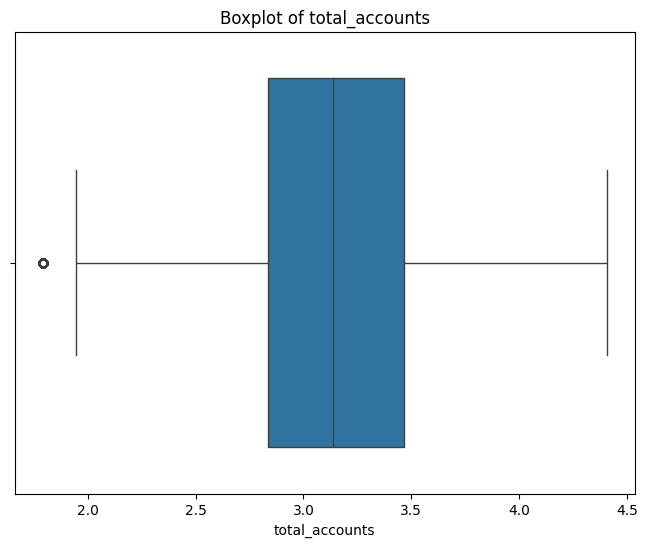

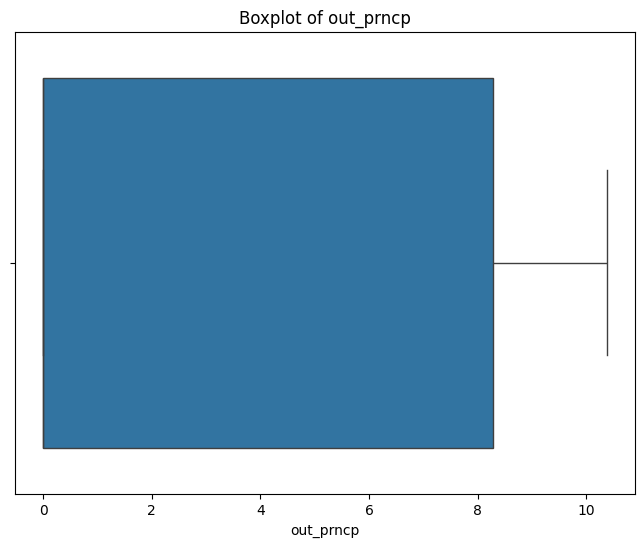

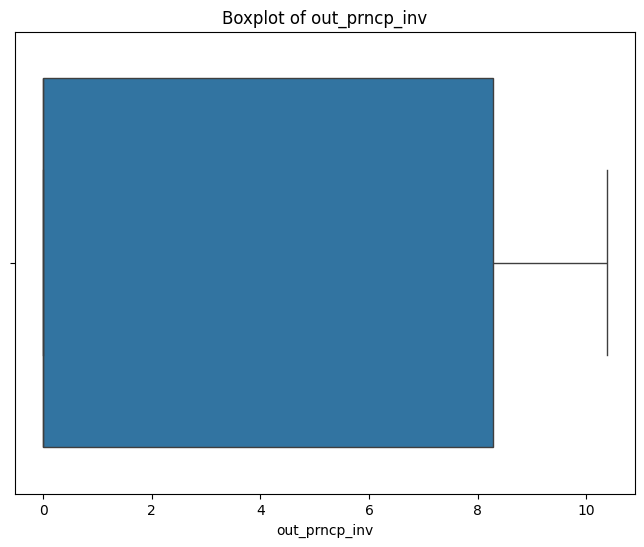

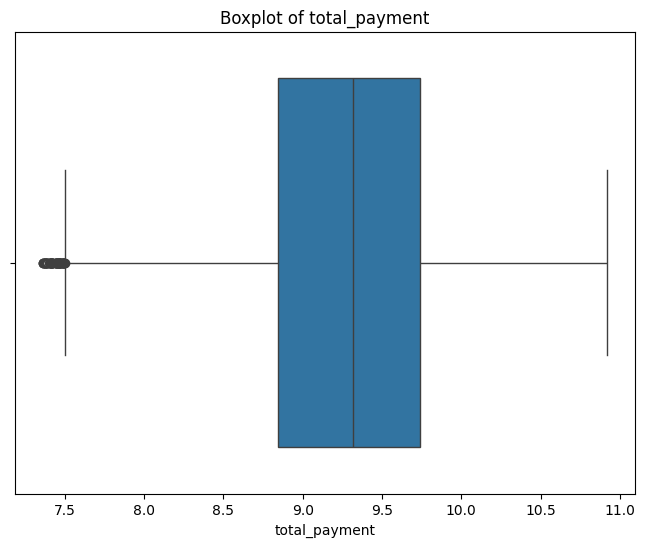

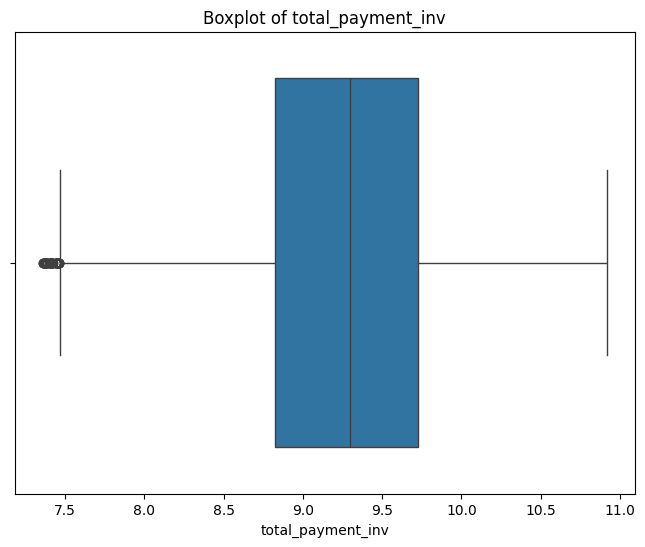

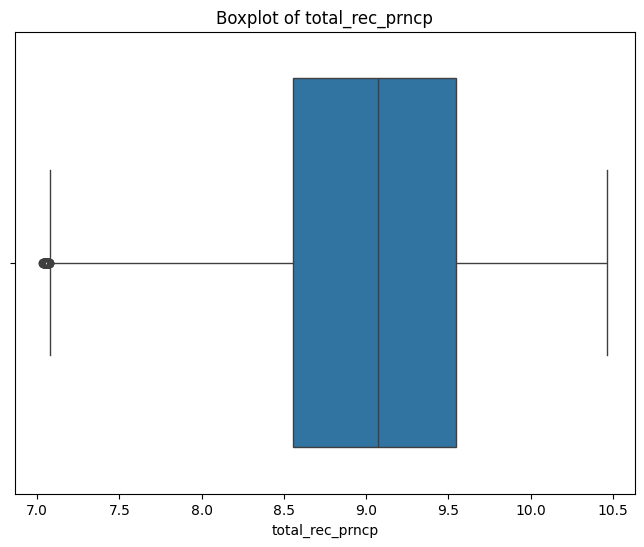

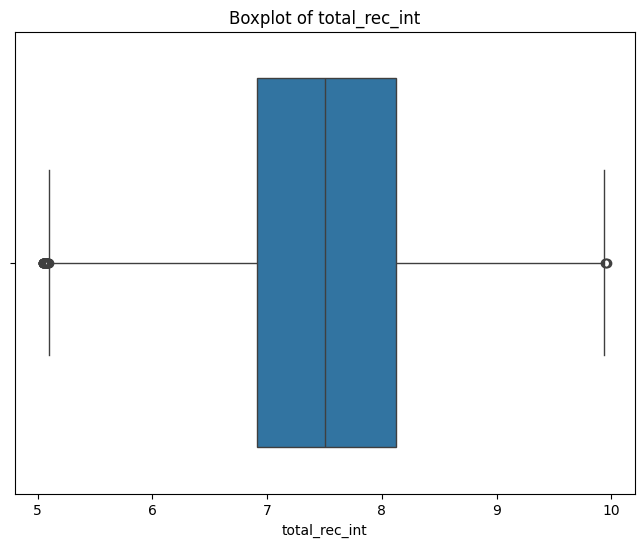

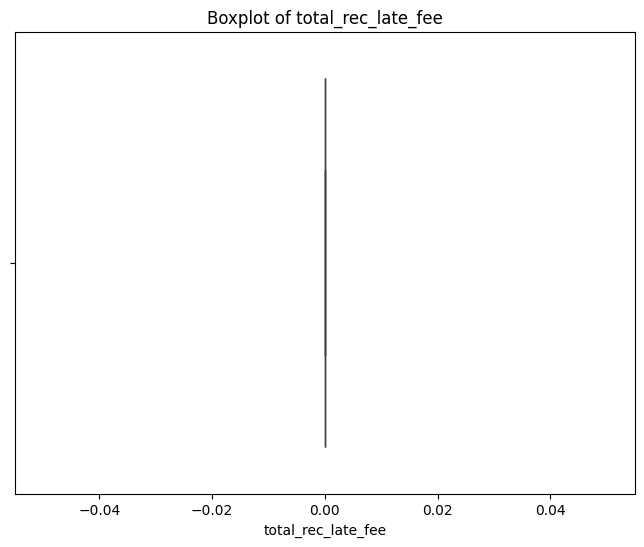

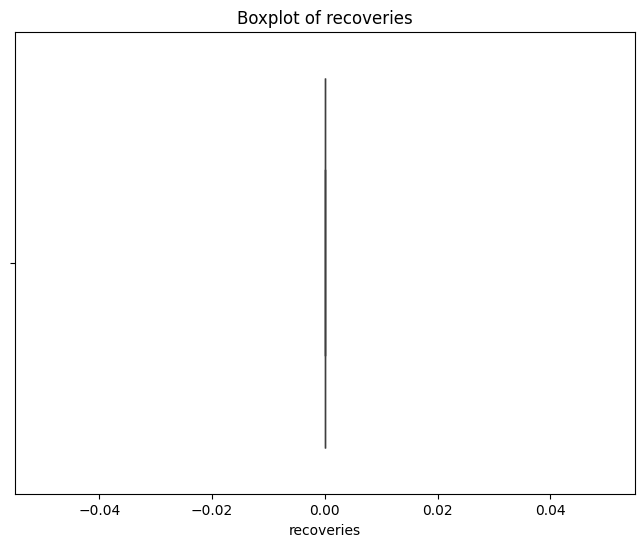

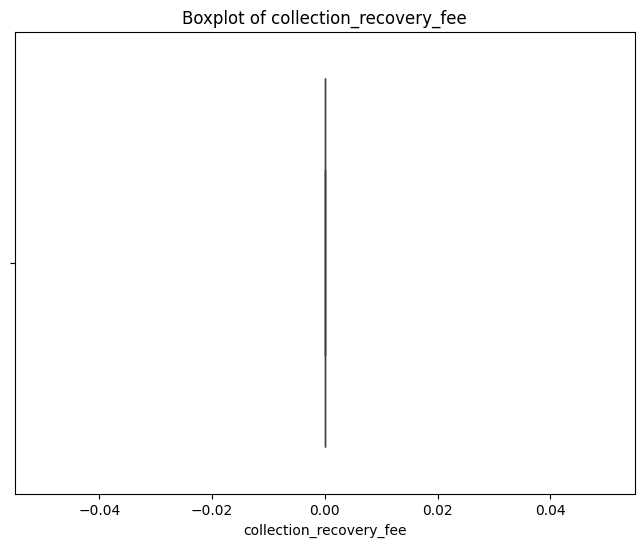

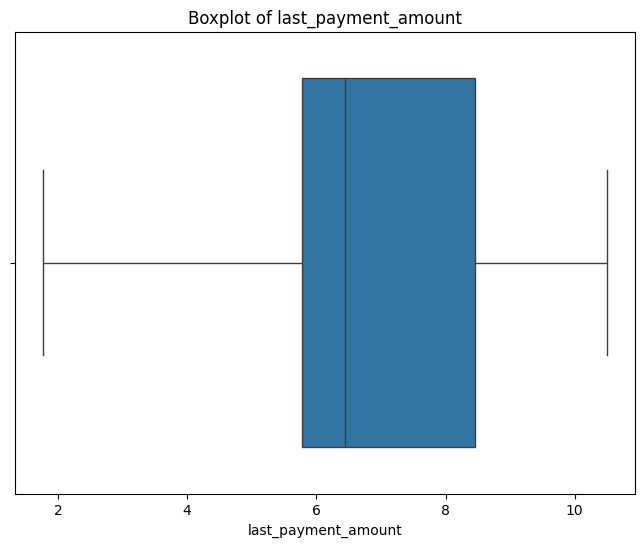

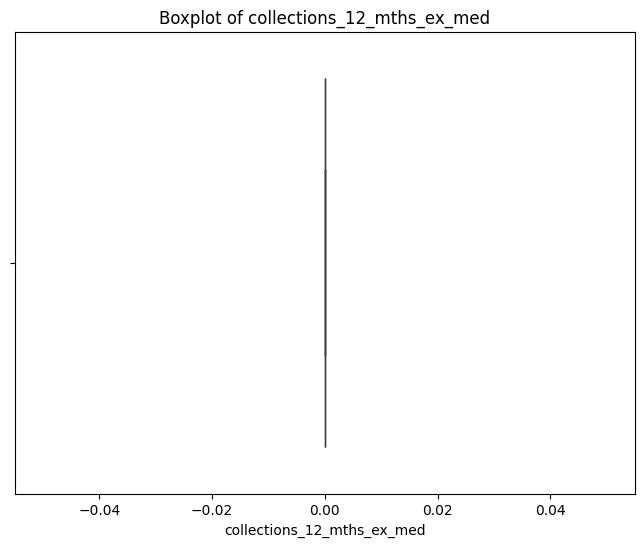

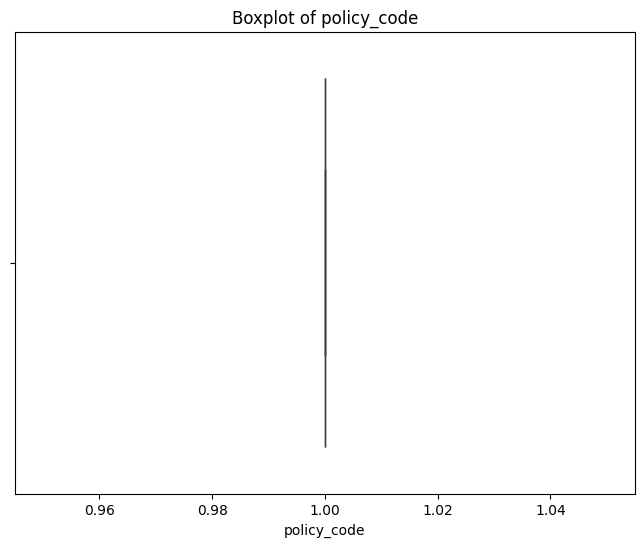

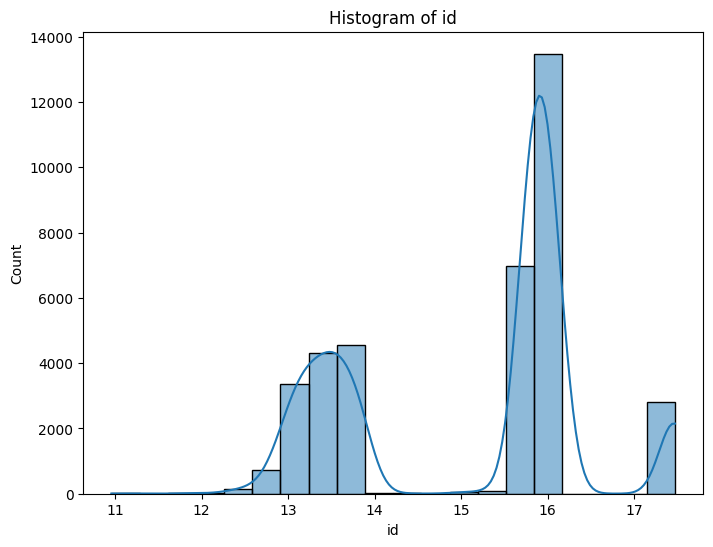

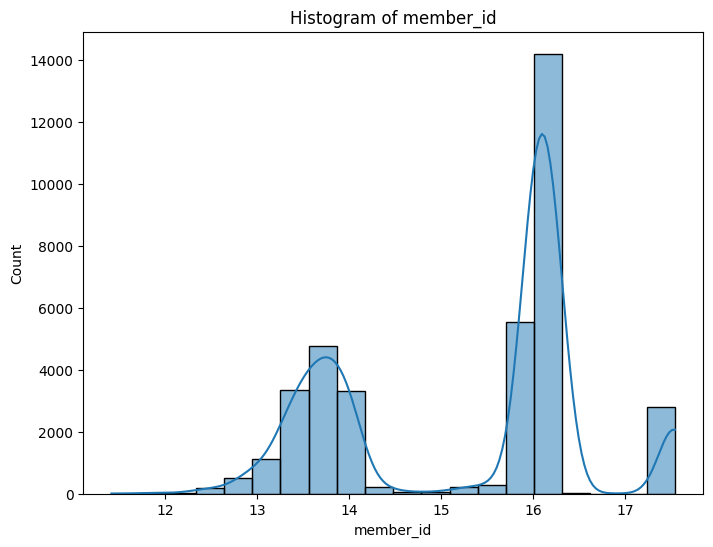

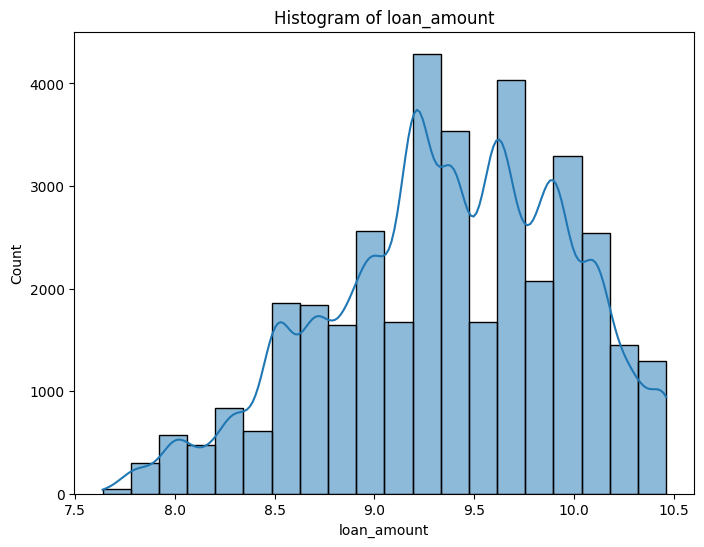

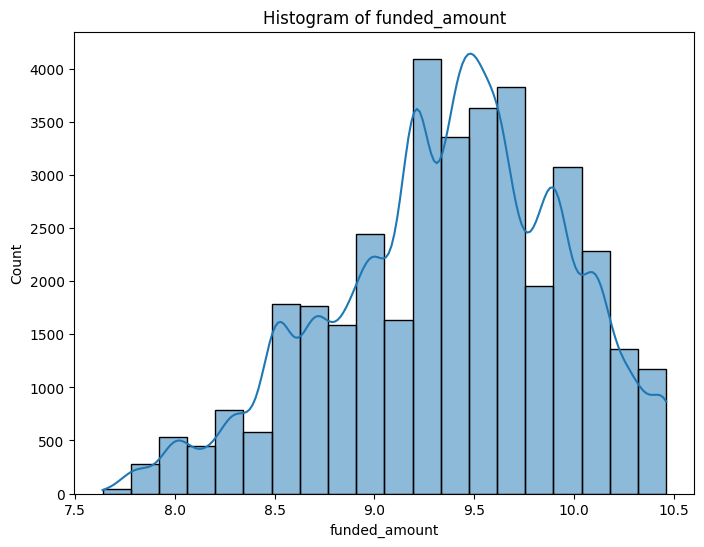

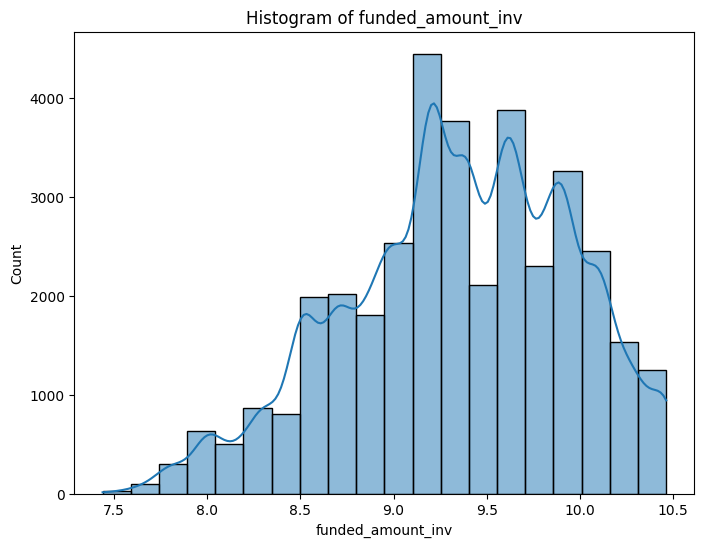

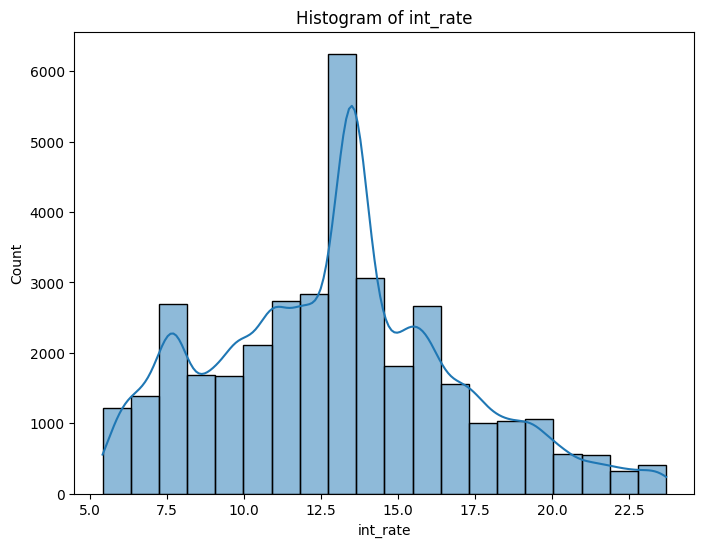

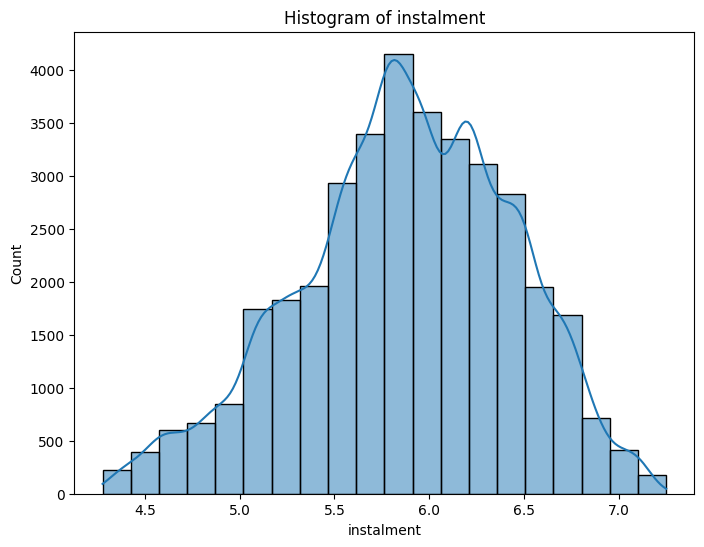

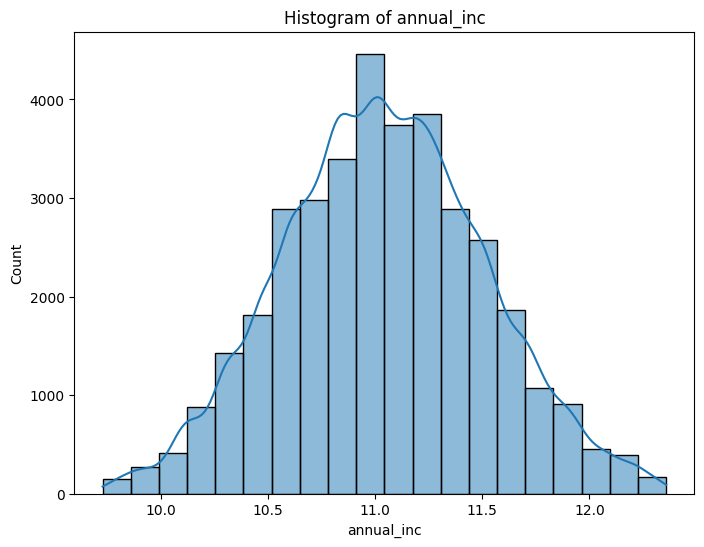

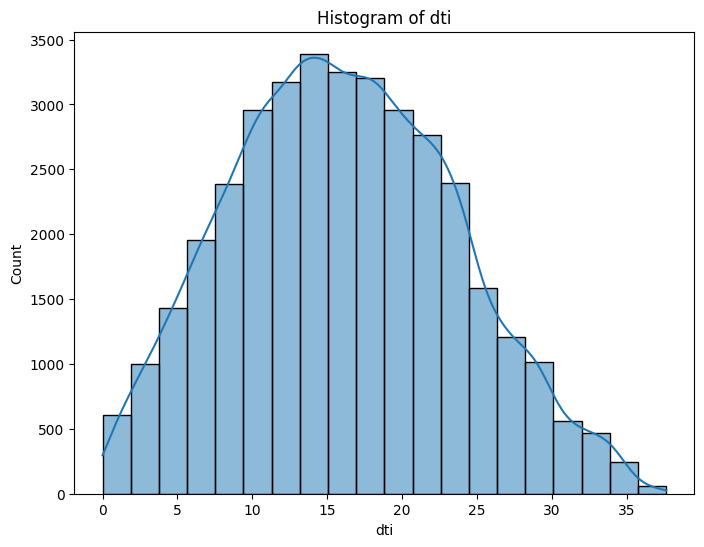

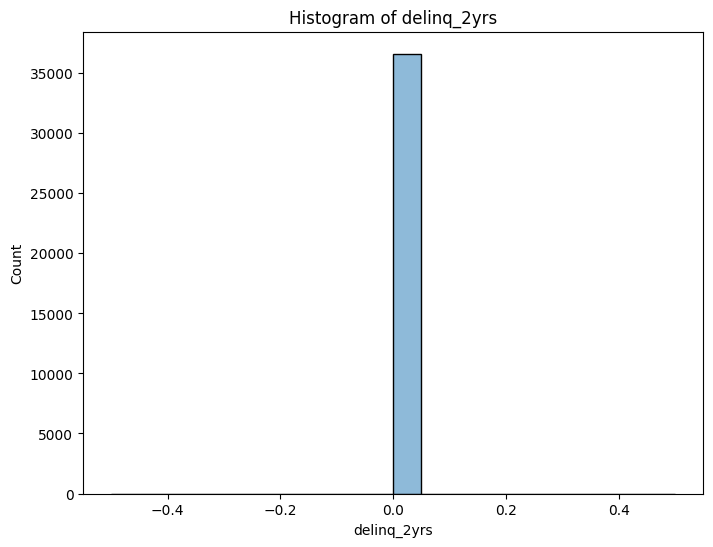

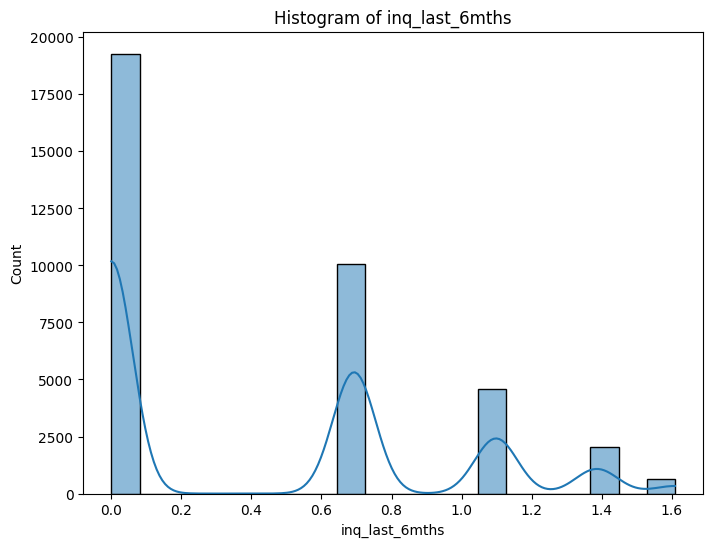

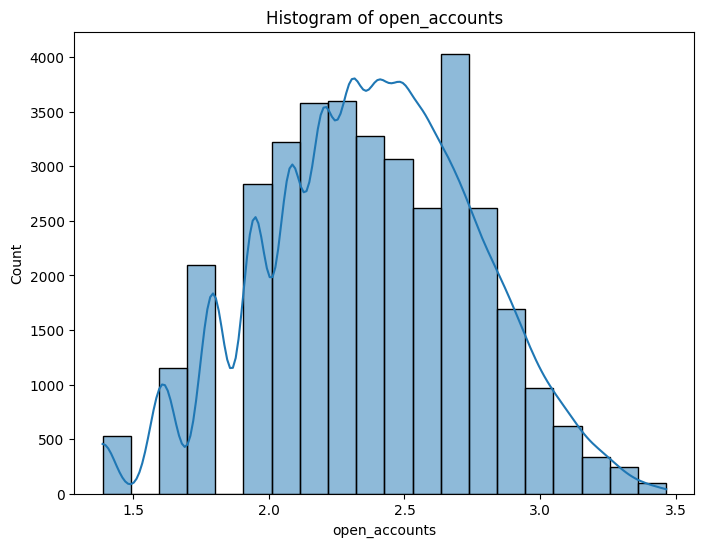

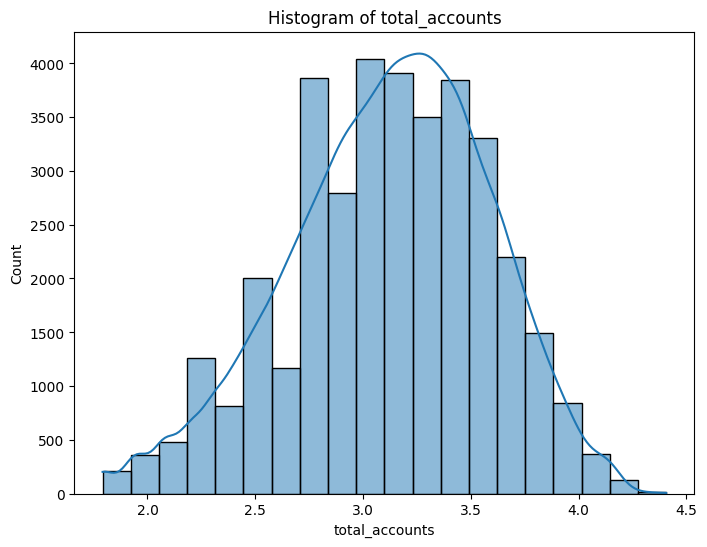

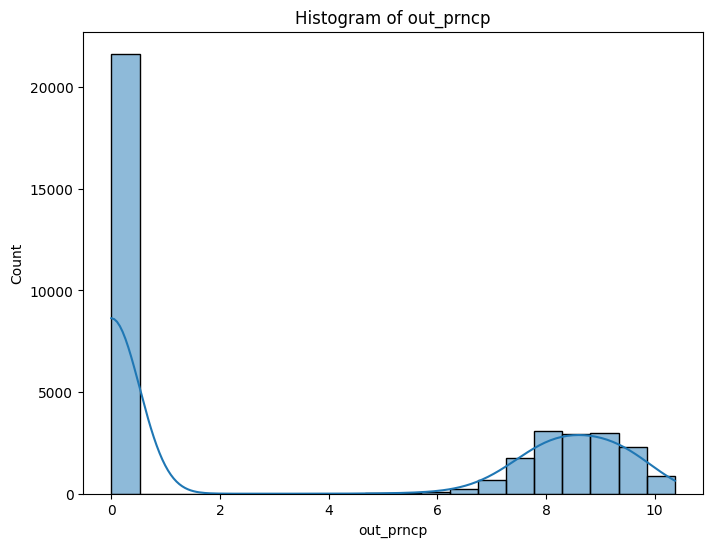

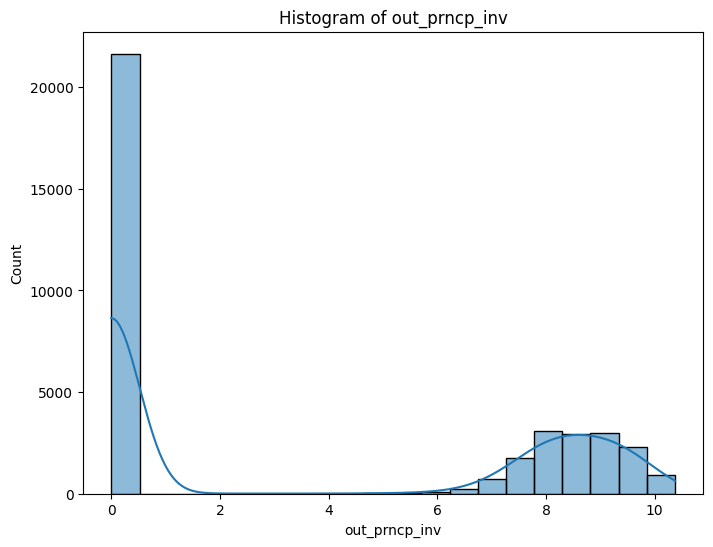

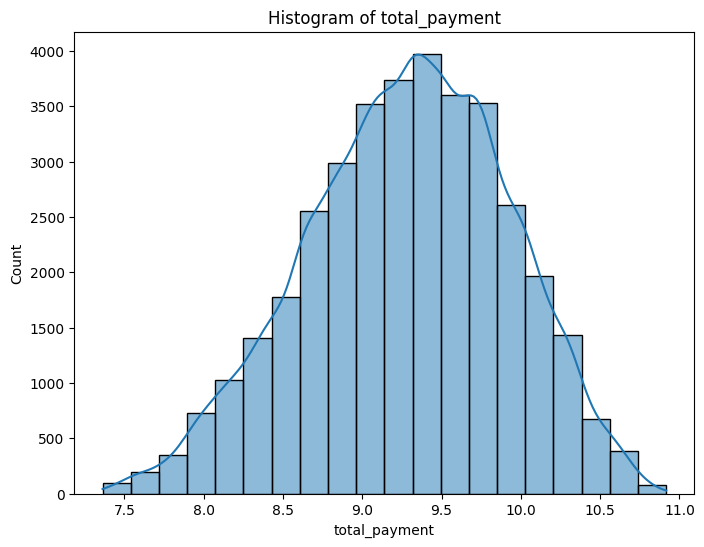

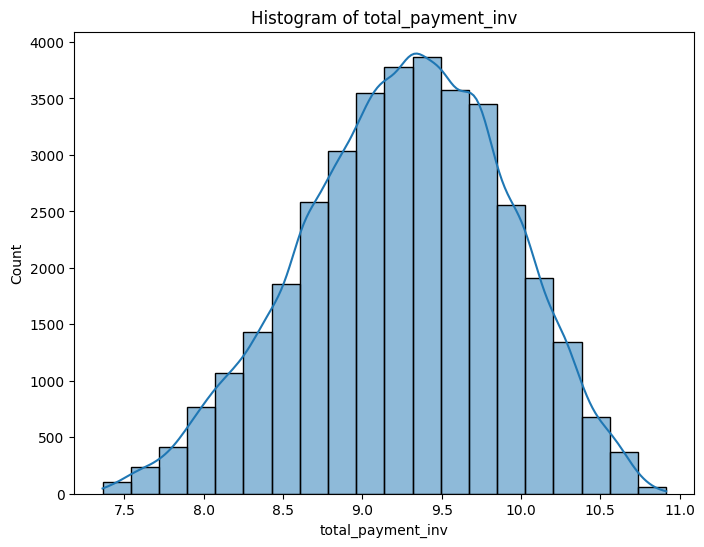

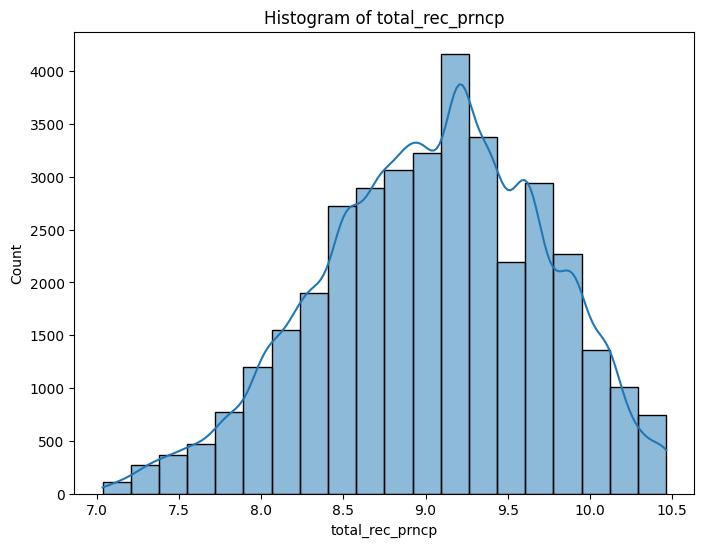

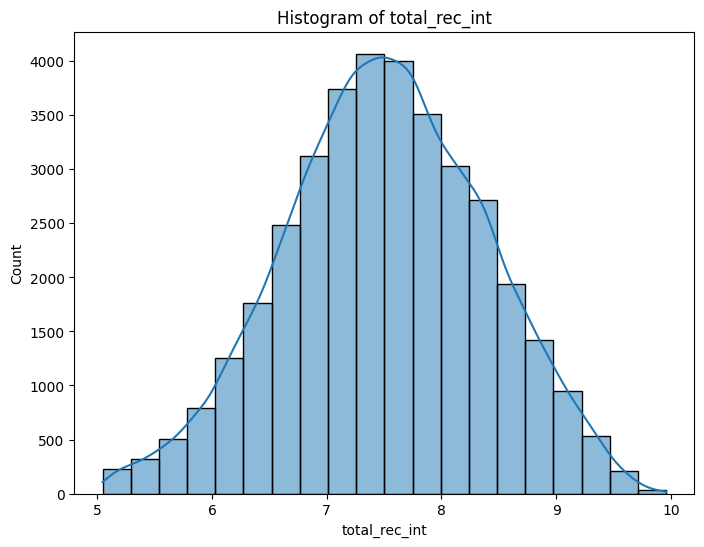

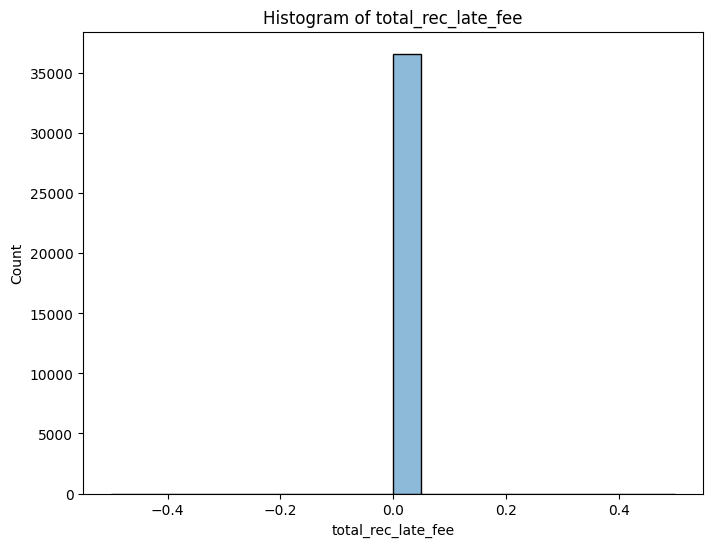

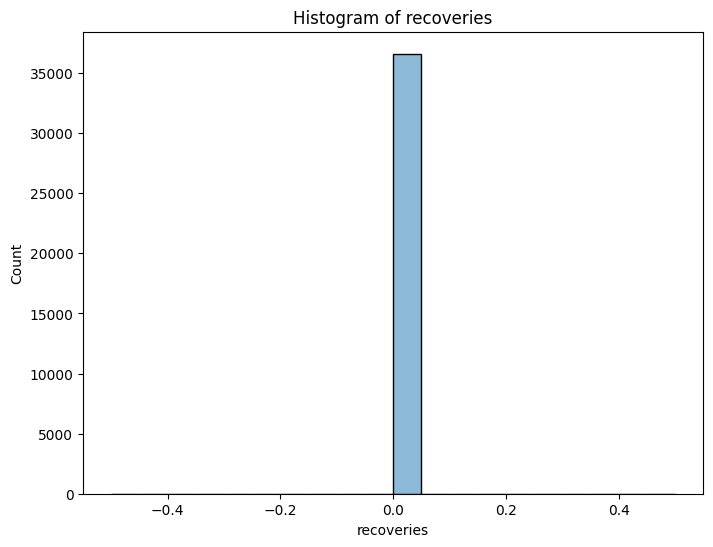

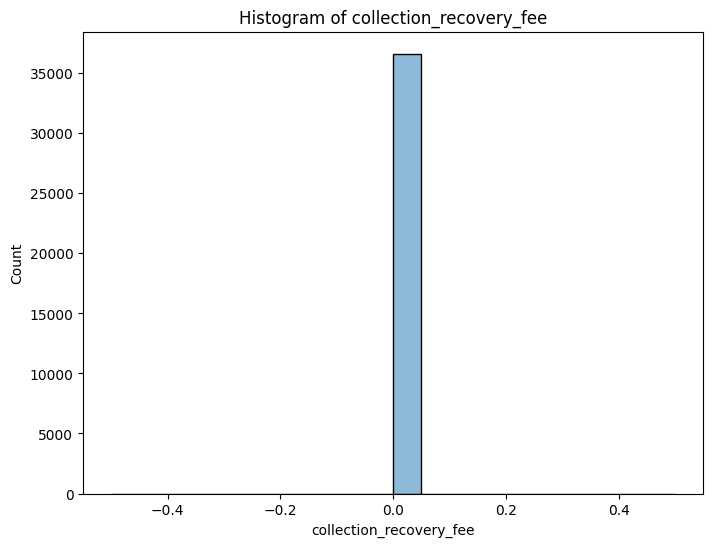

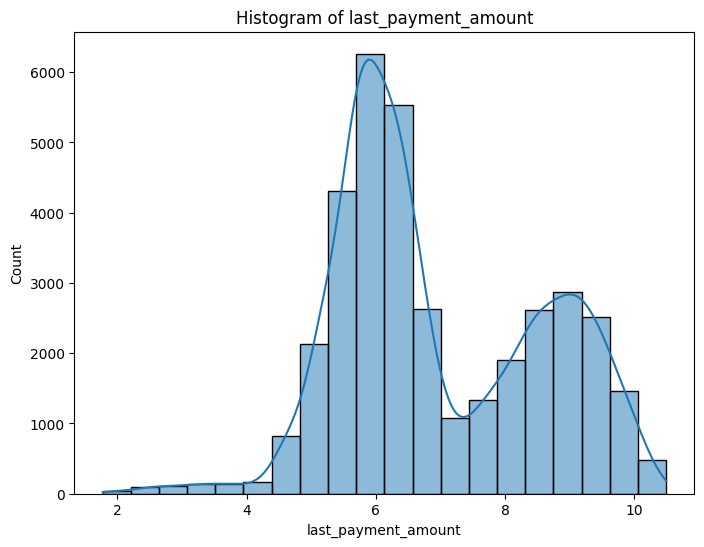

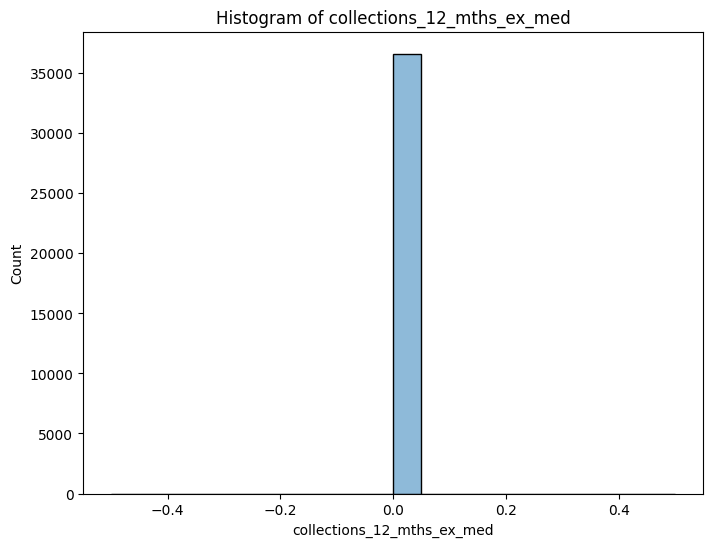

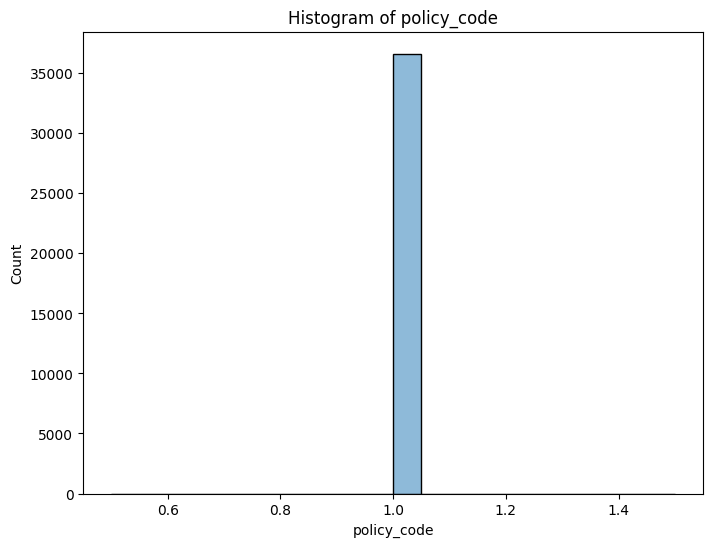

In [7]:
transformer.plot_outliers()
transformer.remove_outliers(method='iqr', threshold=1.5)
transformer.visualize_after_outliers_removal()
transformer.save_dataframe("cleaned_loan_payments.csv")


## Droppping overly correlated columns

Here I made a correlation matric in the DataTransfrom Class to see which columns areoverly correlated and remove them. I decided to use a threshold of 80%.

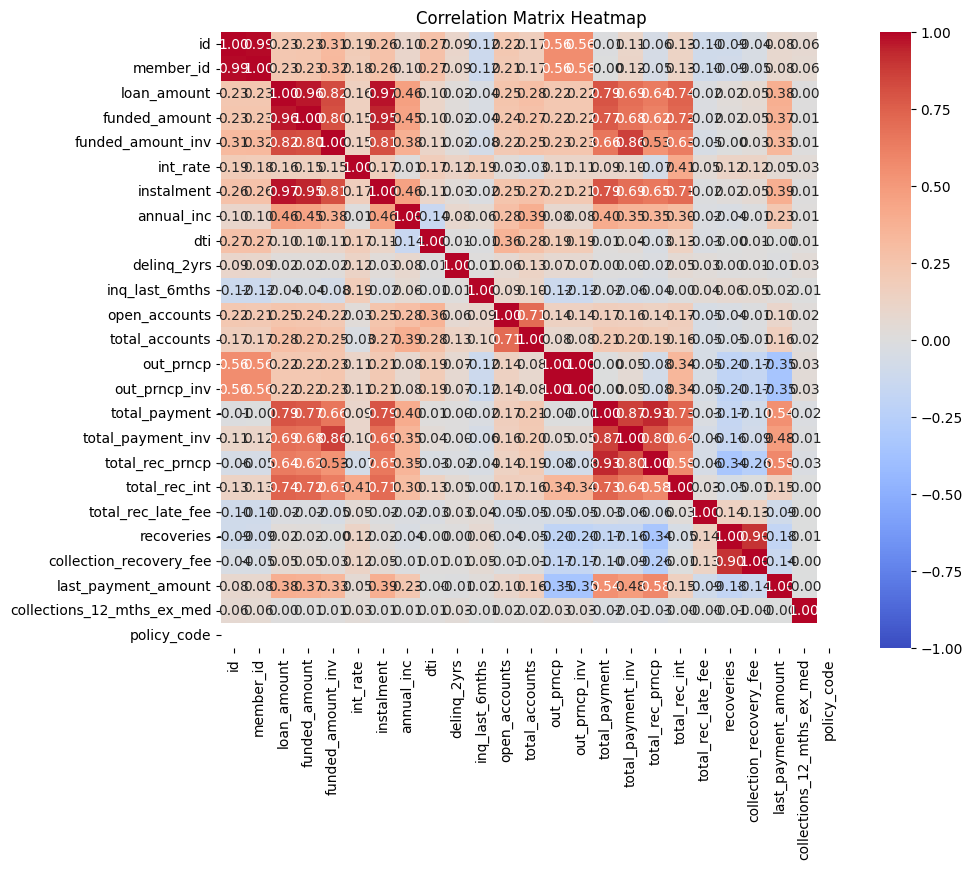

Removed columns: ['member_id', 'funded_amount', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp', 'collection_recovery_fee']


In [8]:

transformer = DataFrameTransform(df)
transformer.visualize_correlation_matrix()
removed_columns = transformer.remove_highly_correlated_columns(threshold=0.8)
print("Removed columns:", removed_columns)

transformer.save_dataframe("cleaned_loan_payments.csv")

## Data Query

Here I will summarise what percentage of the loas are recovered against teh investor funding and the total amount funded. I will be using MatPlotLib as it has already been loaded. 

In [9]:
print(df.columns)

Index(['id', 'loan_amount', 'term', 'int_rate', 'grade', 'sub_grade',
       'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'total_payment', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_payment_date', 'last_payment_amount', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'policy_code', 'application_type'],
      dtype='object')


In [10]:

total_investor_funding = df['loan_amount'].sum()
total_recovered_amount = df['total_payment'].sum()
current_recovery_percentage = (total_recovered_amount / total_investor_funding) * 100

print(f"Current Recovery Percentage: {current_recovery_percentage:.2f}%")


Current Recovery Percentage: 98.35%


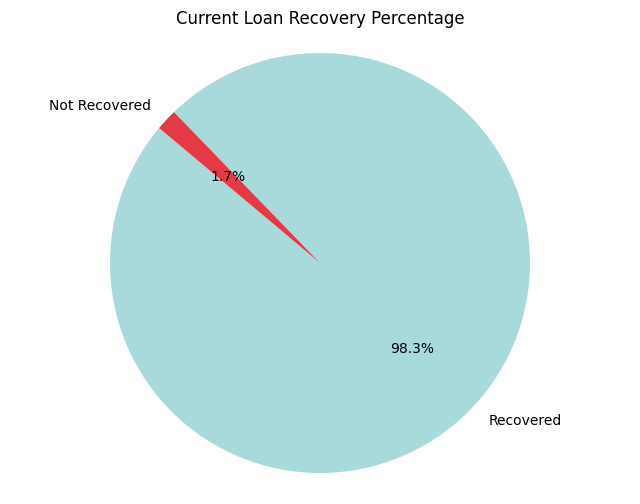

In [11]:
labels = ['Recovered', 'Not Recovered']
sizes = [current_recovery_percentage, 100 - current_recovery_percentage]
colors = ['#A8DADC', '#E63946']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Current Loan Recovery Percentage')
plt.show()

Here I forcast the future recovery  by converting the issue date column to date time format and calculated a future date 180 days from that point (equal to 6 months)

In [12]:
from datetime import timedelta
df['issue_date'] = pd.to_datetime(df['issue_date'],  format='%b-%Y')
most_recent_issue_date = df['issue_date'].max()
future_date = most_recent_issue_date + timedelta(days=180)

Here I converted the last payment date to date time format, calculated the number of months since each loans issue date and determined the average monthly recovery amount.

In [13]:
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'],  format='%b-%Y')
df['months_since_issue'] = (df['last_payment_date'] - df['issue_date']).dt.days / 30
average_monthly_recovery = total_recovered_amount / df['months_since_issue'].sum()
print(average_monthly_recovery)


0.38913018007521794


Here I estimated the future recovery amount by adding six months of average montly recovery to the total recovered amount and calculated the future recovery percentage by dividing it by the total investor funding. 

In [14]:
future_recovered_amount = total_recovered_amount + (average_monthly_recovery * 6)
future_recovery_percentage = (future_recovered_amount / total_investor_funding) * 100

print(f"Future Recovery Percentage (up to 6 months): {future_recovery_percentage:.2f}%")

Future Recovery Percentage (up to 6 months): 98.35%


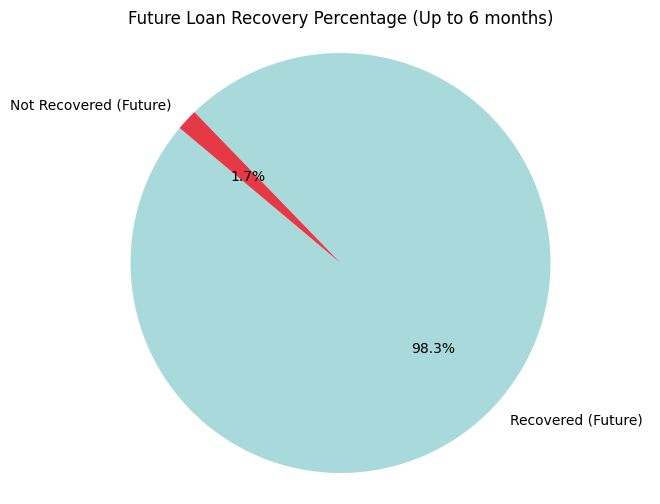

In [15]:
labels_future = ['Recovered (Future)', 'Not Recovered (Future)']
sizes_future = [future_recovery_percentage, 100 - future_recovery_percentage]
colors = ['#A8DADC', '#E63946']

plt.figure(figsize=(8, 6))
plt.pie(sizes_future, labels=labels_future, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Future Loan Recovery Percentage (Up to 6 months)')
plt.show()

## Charged off loans

First I filtered the charged off loans. After this, I calculated the percentage of charged off loans. Finally, I calclated the total amount paid before charge off. 

In [16]:

charged_off_loans = df[df['loan_status'] == 'Charged Off']

total_loans = len(df)
charged_off_count = len(charged_off_loans)
charged_off_percentage = (charged_off_count / total_loans) * 100

total_paid_before_charge_off = charged_off_loans['total_payment'].sum()


print(f"Percentage of Charged Off Loans: {charged_off_percentage:.2f}%")
print(f"Total Amount Paid Before Charge Off: ${total_paid_before_charge_off:.2f}")

Percentage of Charged Off Loans: 10.27%
Total Amount Paid Before Charge Off: $46906.64


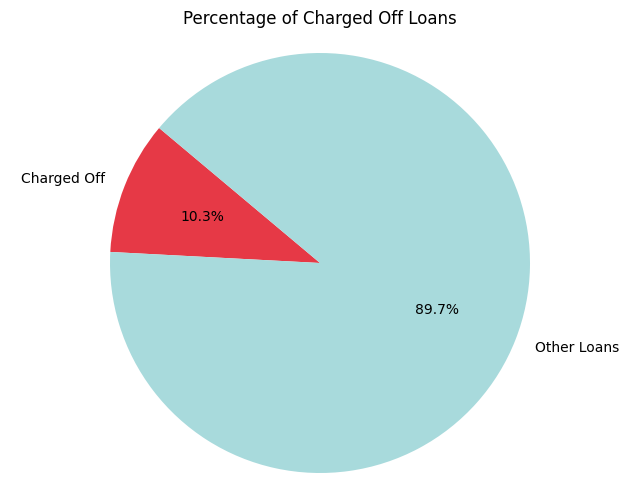

In [17]:
labels = ['Charged Off', 'Other Loans']
sizes = [charged_off_percentage, 100 - charged_off_percentage]
colors = ['#E63946', '#A8DADC']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Charged Off Loans')
plt.show()

## Projected loss

By summing up the total funded amount for the charged off loans I can determine the outstanding amount that would have been recovered if the loans had finished their term. 

Projected Loss from Charged Off Loans: $ 51835.29
Non-numeric values in 'term' column:
7        NaN
56       NaN
83       NaN
90       NaN
117      NaN
        ... 
54152    NaN
54156    NaN
54180    NaN
54194    NaN
54198    NaN
Name: term, Length: 5571, dtype: object


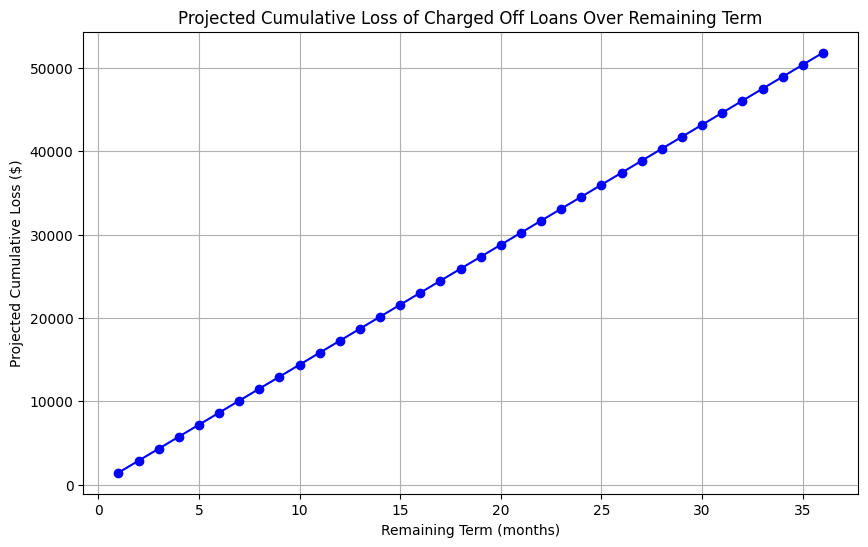

In [18]:
charged_off_loans = df[df['loan_status'] == 'Charged Off']

total_funded_amount_charged_off = charged_off_loans['loan_amount'].sum()
total_recoveries_charged_off = charged_off_loans['recoveries'].sum()
remaining_principal_charged_off = total_funded_amount_charged_off - total_recoveries_charged_off
projected_loss_charged_off = total_funded_amount_charged_off 

print(f"Projected Loss from Charged Off Loans: $ {projected_loss_charged_off:.2f}")

charged_off_loans.loc[:, 'term'] = pd.to_numeric(charged_off_loans['term'], errors='coerce')

if charged_off_loans['term'].isnull().any():
    print("Warning: Some values in 'term' column could not be converted to numeric.")
    non_numeric_values = charged_off_loans.loc[charged_off_loans['term'].isnull(), 'term']
    print("Non-numeric values in 'term' column:")
    print(non_numeric_values)

remaining_term = charged_off_loans['term'].mean() if 'term' in charged_off_loans.columns else 36  
if pd.isna(remaining_term):
    remaining_term = 36 

terms = np.arange(1, int(remaining_term) + 1)
monthly_loss = projected_loss_charged_off / remaining_term
cumulative_loss = monthly_loss * terms

#terms = range(0, int(remaining_term) + 1)
#loss_over_term = [projected_loss_charged_off] * (int(remaining_term) + 1)

plt.figure(figsize=(10, 6))
plt.plot(terms, cumulative_loss, marker='o', linestyle='-', color='b')
plt.xlabel('Remaining Term (months)')
plt.ylabel('Projected Cumulative Loss ($)')
plt.title('Projected Cumulative Loss of Charged Off Loans Over Remaining Term')
plt.grid(True)
plt.show()

## Customers behind on payments

First I identified the customers currently behind on patments and calculated a percantage comapred to all of the loans. Then I counted the percentage of clients behind on payments and calculated the potential loss if loans are charged off. I then projected teh loss if customers complete full loan terms. 

In [21]:
# Check unique values in 'loan_status' column
#print(loans_data['loan_status'].unique())

In [22]:
loans_data = pd.read_csv("loan_payments.csv")

behind_statuses = ["late (31_120 days)", "Late (16_30 days)", "Charged Off", "Default", 'In Grace Period']
behind_customers = loans_data[loans_data['loan_status'].isin(behind_statuses)]

total_customers = len(loans_data)
total_behind_customers = len(behind_customers)
charged_off_amount = behind_customers[behind_customers['loan_status'] == 'Charged Off']["loan_amount"]
behind_percentage = (len(behind_customers) / total_customers) * 100



In [23]:
charged_off_amount = behind_customers[behind_customers['loan_status'] == 'Charged Off']['loan_amount'].sum()
projected_loss_full_term = behind_customers[behind_customers['loan_status'].isin(["Late (31-120 days)", "Late (16-30 days)", "Default", "In Grace Period"])]["loan_amount"].sum()
total_expected_revenue = loans_data['loan_amount'].sum()
late_and_defaulted_amount = behind_customers['loan_amount'].sum()
percentage_revenue = (late_and_defaulted_amount / total_expected_revenue) * 100

print(f"Percentage of customers behind on payments: {behind_percentage:.2f}%")
print(f"Total number of customers behind on payments: {total_behind_customers}")
print(f"Potential loss if loans are charged off: ${charged_off_amount}")
print(f"Projected loss if customers complete full loan term: ${projected_loss_full_term}")
print(f"Percentage of total expected revenue from late and defaulted customers: {percentage_revenue:.2f}%")

Percentage of customers behind on payments: 10.86%
Total number of customers behind on payments: 5888
Potential loss if loans are charged off: $76359400
Projected loss if customers complete full loan term: $4827925
Percentage of total expected revenue from late and defaulted customers: 11.23%


## Customers indicators

First, I will create a subset of the dataset for customers who are charged off and late on payments. I will then analyse the grade of the loan as an indicator of risk assigned by the company. I wil check if the purpose for which the loan was taken affects the repayment behaviour and take into account home ownership. I will then compare tehse factors. 

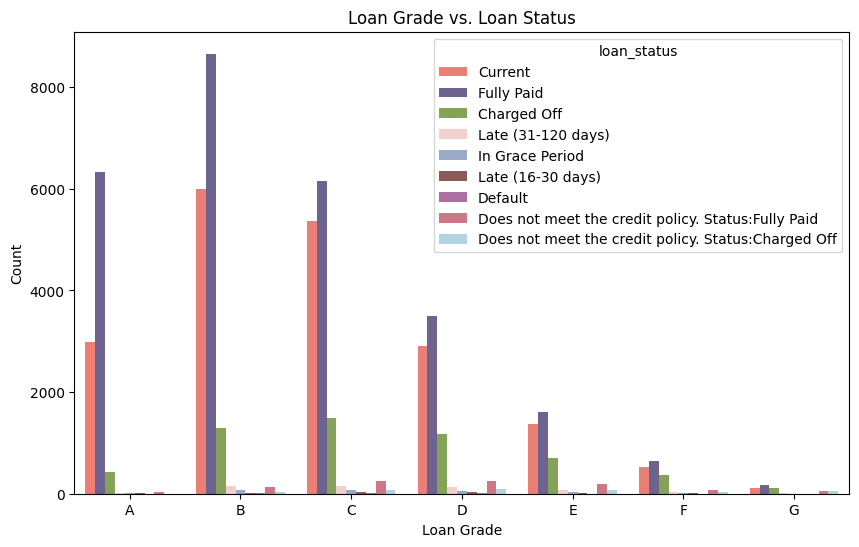

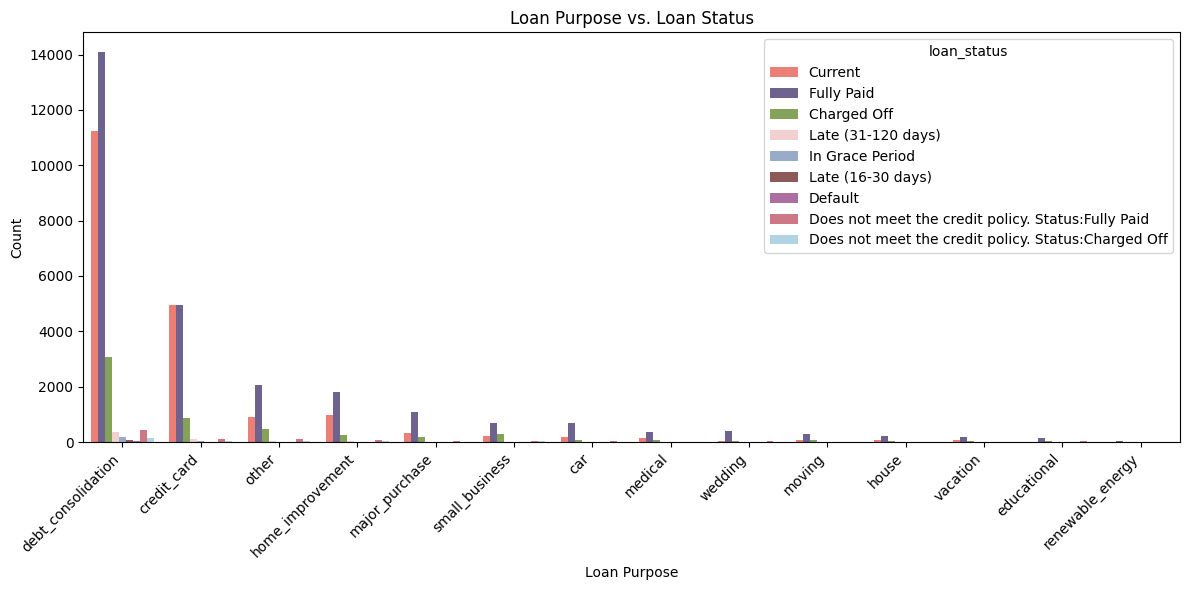

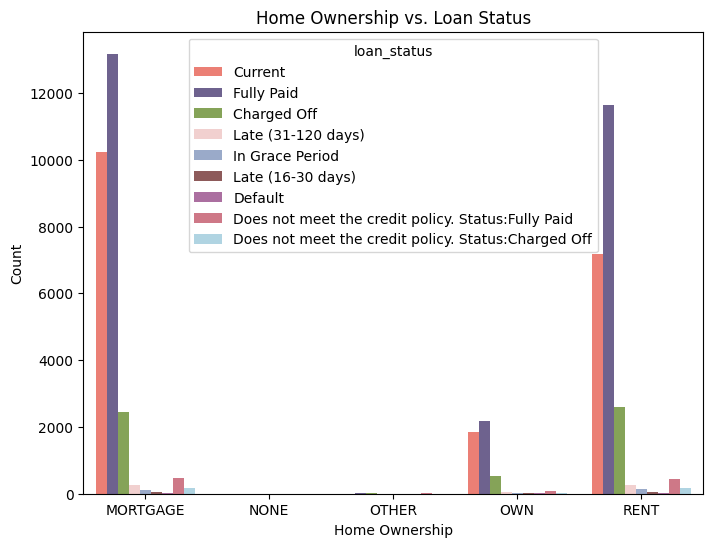

/var/folders/j4/7c4hcm2s7zqch_dkpty46sp40000gn/T/ipykernel_2465/2701071266.py:35: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.countplot(x='grade', hue='loan_status', data=charged_off_loans, order=sorted(charged_off_loans['grade'].unique()), palette=custom_palette_expanded)


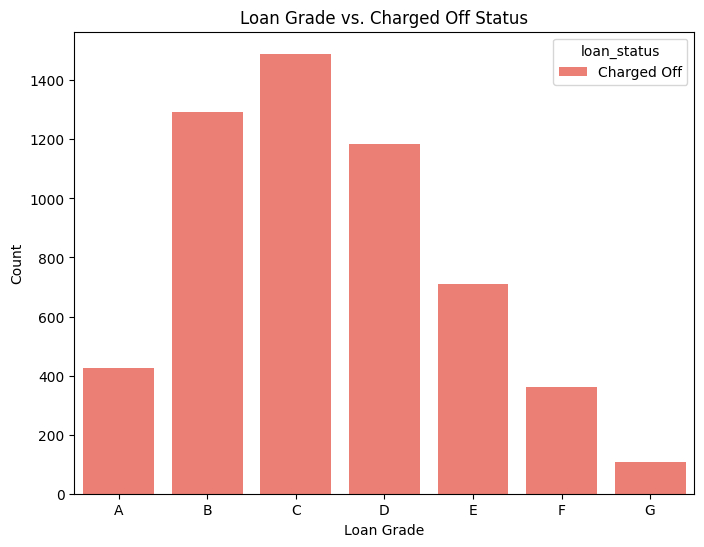

/var/folders/j4/7c4hcm2s7zqch_dkpty46sp40000gn/T/ipykernel_2465/2701071266.py:42: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(x='grade', hue='loan_status', data=late_loans, order=sorted(late_loans['grade'].unique()), palette=custom_palette_expanded)


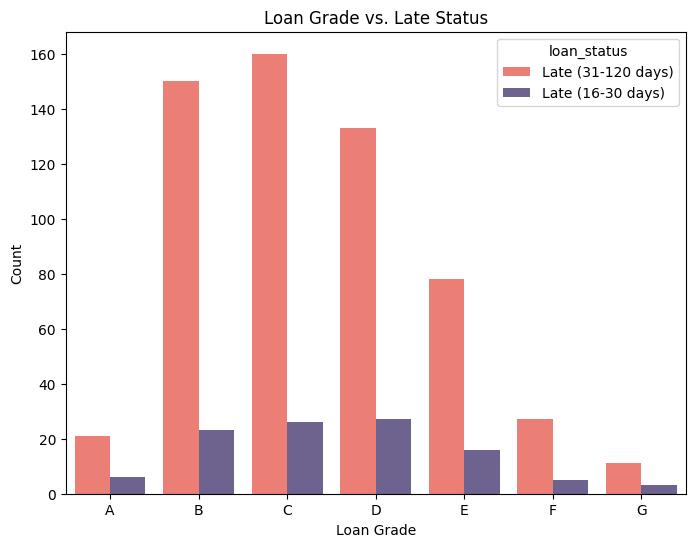

In [24]:
charged_off_loans = loans_data[loans_data['loan_status'] == 'Charged Off']
late_loans = loans_data[loans_data["loan_status"].isin(["Late (31-120 days)", "Late (16-30 days)"])]

custom_palette_expanded = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251',
                           '#B565A7', '#DC6A7E', '#A8D8EA']

# Compare grade of the loan
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=loans_data, order=sorted(loans_data['grade'].unique()), palette=custom_palette_expanded)
plt.title('Loan Grade vs. Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

# Compare purpose of the loan
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='loan_status', data=loans_data, order=loans_data['purpose'].value_counts().index, palette=custom_palette_expanded)
plt.title('Loan Purpose vs. Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Compare home ownership
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loans_data, order=sorted(loans_data['home_ownership'].unique()), palette=custom_palette_expanded  )
plt.title('Home Ownership vs. Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

# Comparison between Charged Off and Late loans
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', hue='loan_status', data=charged_off_loans, order=sorted(charged_off_loans['grade'].unique()), palette=custom_palette_expanded)
plt.title('Loan Grade vs. Charged Off Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='grade', hue='loan_status', data=late_loans, order=sorted(late_loans['grade'].unique()), palette=custom_palette_expanded)
plt.title('Loan Grade vs. Late Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()
